# `MARKET SALES PREDICTION`

# PART 0. IMPORT AND FUNCTIONS

In [88]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

# PART 1. LOOK AT THE BIG PICTURE (DONE)

# PART 2. GET THE DATA (DONE). LOAD DATA

In [89]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

### `MARKET SALES PREDICTION Classifier`

* Attribute Information

| Variables | Description | Relation to Hypothesis |
| :- | -: | :-: |
| Item_Identifier  | Unique product ID | ID Variable |
| Item_Weight  | Weight of product | Not considered in hypothesis |
| Item_Fat_Content  | Whether the product is low fat or not | Linked to 'Utility' hypothesis. Low fat items are generally used more than others |
| Item_Visibility  | The % of total display area of all products in a store allocated to the particular product | Linked to 'Display Area' hypothesis. |
| Item_Type  | The category to which the product belongs | More inferences about 'Utility' can be derived from this. |
| Item_MRP  | Maximum Retail Price (list price) of the product | Not considered in hypothesis |
| Outlet_Identifier  | Unique store ID | ID Variable |
| Outlet_Establishment_Year  | The year in which store was established | Not considered in hypothesis |
| Outlet_Size  | The size of the store in terms of ground area covered | Linked to 'Store Capacity' hypothesis |
| Outlet_Location_Type  | The type of city in which the store is located | Linked to 'City Type' hypothesis. |
| Outlet_Type  | Whether the outlet is just a grocery store or some sort of supermarket | Linked to 'Store Capacity' hypothesis again.|
| Item_Outlet_Sales  | Sales of the product in the particular store. This is the outcome variable to be predicted. | Outcome variable |

# PART 3. DISCOVER THE DATA TO GAIN INSIGHTS


### 3.1. Quick view of the data

In [90]:
display(train.head())
print(train.columns)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [91]:
display(test.head())
print(test.columns)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [92]:
print(train.shape)
print(test.shape)
train["source"] = "train"
test["source"] = "test"
test["Item_Outlet_Sales"] = 0.0
df = pd.concat([train, test], sort = False, ignore_index = True)
print(df.shape)
display(df.head())

(8523, 12)
(5681, 11)
(14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### 3.2. Check Missing Values 

In [93]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [94]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [95]:
df.skew()

C:\Users\TRI PC\AppData\Local\Temp\ipykernel_71940\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

In [96]:
display(df.describe())
display(df.describe(include = object))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,8485,2013,1559,4655,5583,9294,8523


In [97]:
display(df.isnull().sum()/df.shape[0] * 100)
print("Visibility = 0 :", (df["Item_Visibility"].values==0).sum()/df.shape[0] * 100)

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
source                        0.000000
dtype: float64

Visibility = 0 : 6.188397634469164


### 3.3. Check Outlier(Noise)

In [98]:
df1 = df[df["Item_Visibility"] > 0]

Stats = df1.describe()
for col in Stats.columns:
  meanV, stdV = Stats.loc["mean", col], Stats.loc["std", col]
  minV, maxV = Stats.loc["min", col], Stats.loc["max", col]
  q1, q2, q3 = Stats.loc["25%", col], Stats.loc["50%", col], Stats.loc["75%", col]
  iqr = q3 - q1
  ConfRange1 = [round(meanV - 3 * stdV,2), round(meanV + 3 * stdV,2)]
  ConfRange2 = [round(q1 - 1.5 * iqr,2), round(q3 + 1.5 * iqr,2)]
  print(f"{col} : \n\tMin is {minV} and Max is {maxV} \n\tConfident Range 1 is {ConfRange1} and Range 2 is {ConfRange2}")

Item_Weight : 
	Min is 4.555 and Max is 21.35 
	Confident Range 1 is [-1.15, 26.75] and Range 2 is [-3.35, 28.81]
Item_Visibility : 
	Min is 0.003574698 and Max is 0.328390948 
	Confident Range 1 is [-0.08, 0.22] and Range 2 is [-0.07, 0.2]
Item_MRP : 
	Min is 31.29 and Max is 266.8884 
	Confident Range 1 is [-44.93, 327.14] and Range 2 is [-43.43, 323.43]
Outlet_Establishment_Year : 
	Min is 1985.0 and Max is 2009.0 
	Confident Range 1 is [1972.7, 2022.96] and Range 2 is [1961.5, 2029.5]
Item_Outlet_Sales : 
	Min is 0.0 and Max is 13086.9648 
	Confident Range 1 is [-3785.48, 6400.42] and Range 2 is [-3245.77, 5409.62]


### 3.4. Check Inconsistent

In [99]:
CatFeatures = [col for col in df.columns if df[col].dtypes in ["object"]]
NumFeatures = [col for col in df.columns if df[col].dtypes not in ["object"]]
print("Numeric Features : ", NumFeatures)
print("Categorical Features : ", CatFeatures)

for col in CatFeatures:
  print(f"\n{col} : \n{df[col].value_counts()}")

Numeric Features :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Categorical Features :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source']

Item_Identifier : 
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content : 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type : 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others 

In [100]:
df.skew()

C:\Users\TRI PC\AppData\Local\Temp\ipykernel_71940\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

### 3.5. Check Imbalanced

In [101]:
df["Item_Outlet_Sales"].skew()

1.5446838706795227

In [102]:
df.skew()


C:\Users\TRI PC\AppData\Local\Temp\ipykernel_71940\547062910.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

### 3.6. EDA with Visualization on Univariate, BiVariate and MultiVariate Analysis

In [103]:
print('Categorical Features: ',CatFeatures)
print('\nNumeric Features: ',NumFeatures)
cat = list(set(CatFeatures) - set("source"))
print('\nCategorical Features (without source):',cat)

Categorical Features:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source']

Numeric Features:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

Categorical Features (without source): ['Item_Type', 'Item_Fat_Content', 'Outlet_Type', 'Item_Identifier', 'Outlet_Size', 'Outlet_Identifier', 'Outlet_Location_Type', 'source']


### 3.7. Exploring Data Analysis

##### 1. Univariate Analysis

In [104]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


##### a) Categorical Features 

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

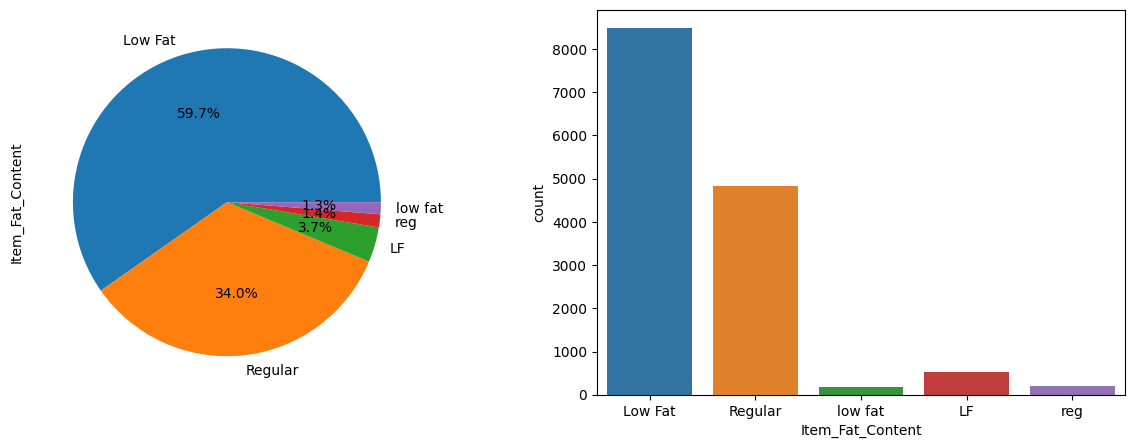

In [105]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data=df,x="Item_Fat_Content")
df['Item_Fat_Content'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

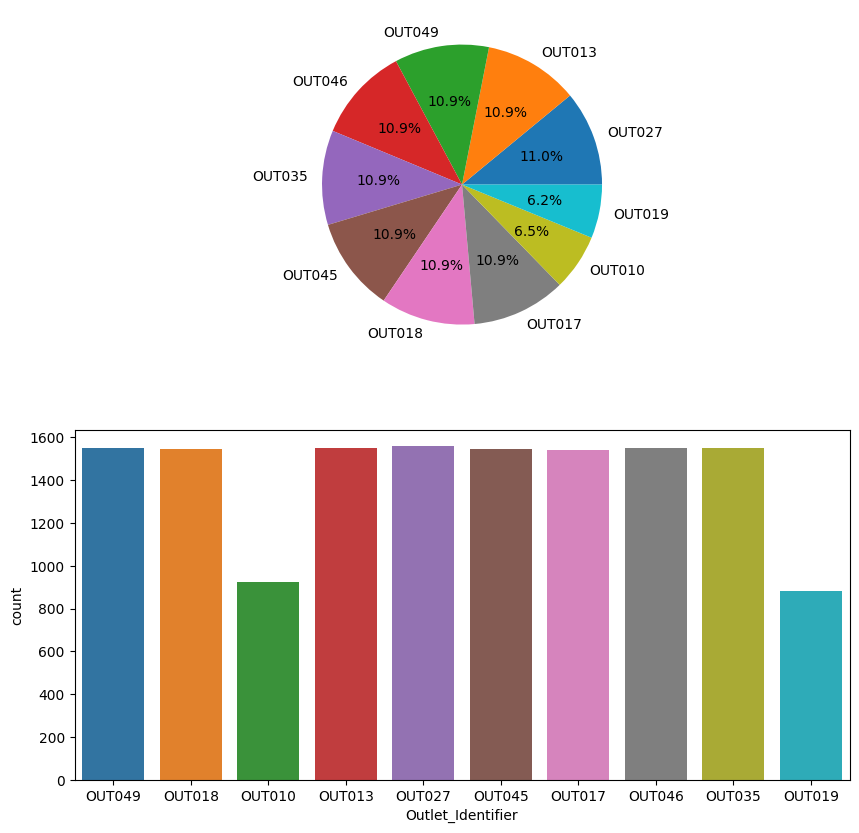

In [106]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
df['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(data=df,x="Outlet_Identifier")
df['Outlet_Identifier'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

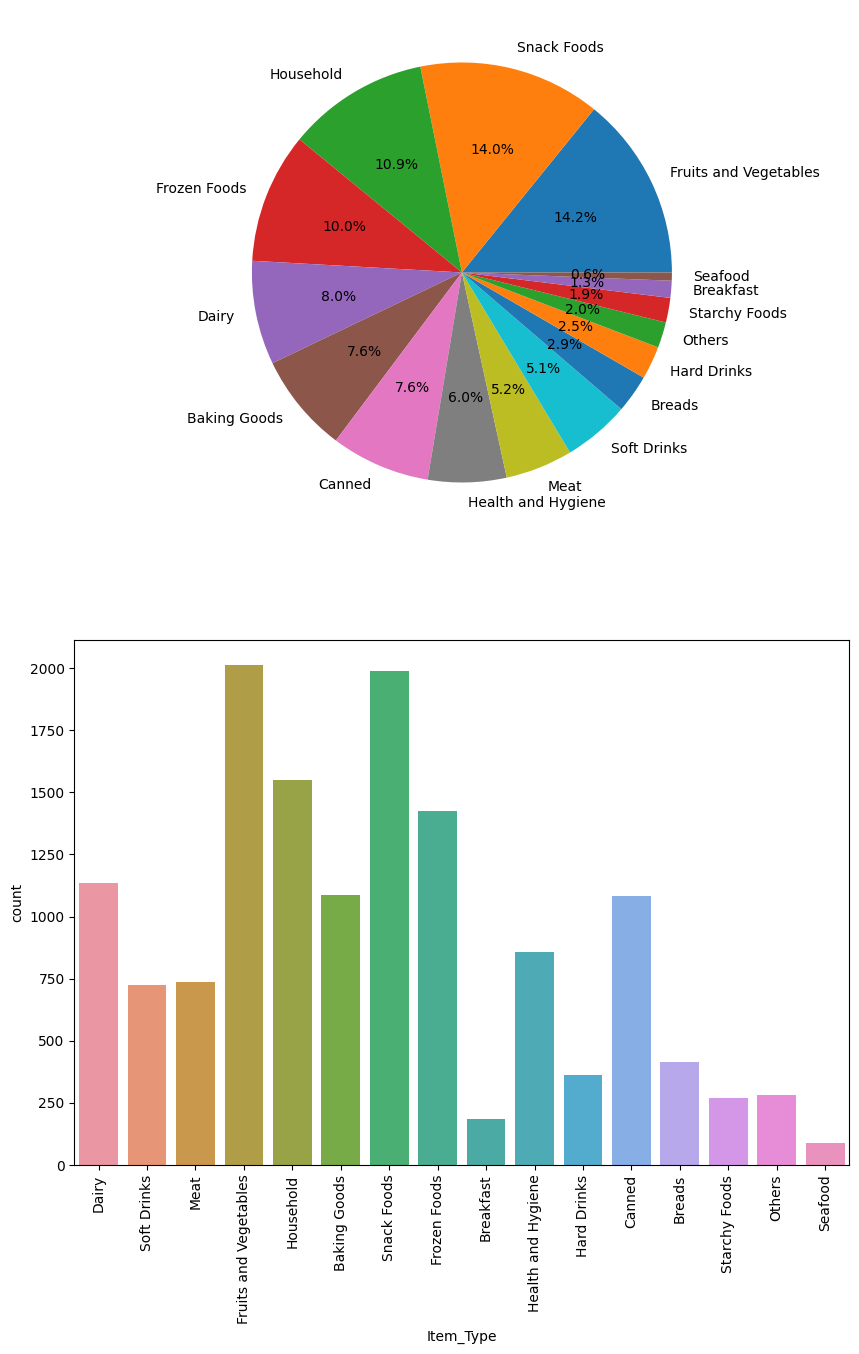

In [107]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize':10})
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(data=df,x="Item_Type")
plt.xticks(rotation = 90)
df['Item_Type'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

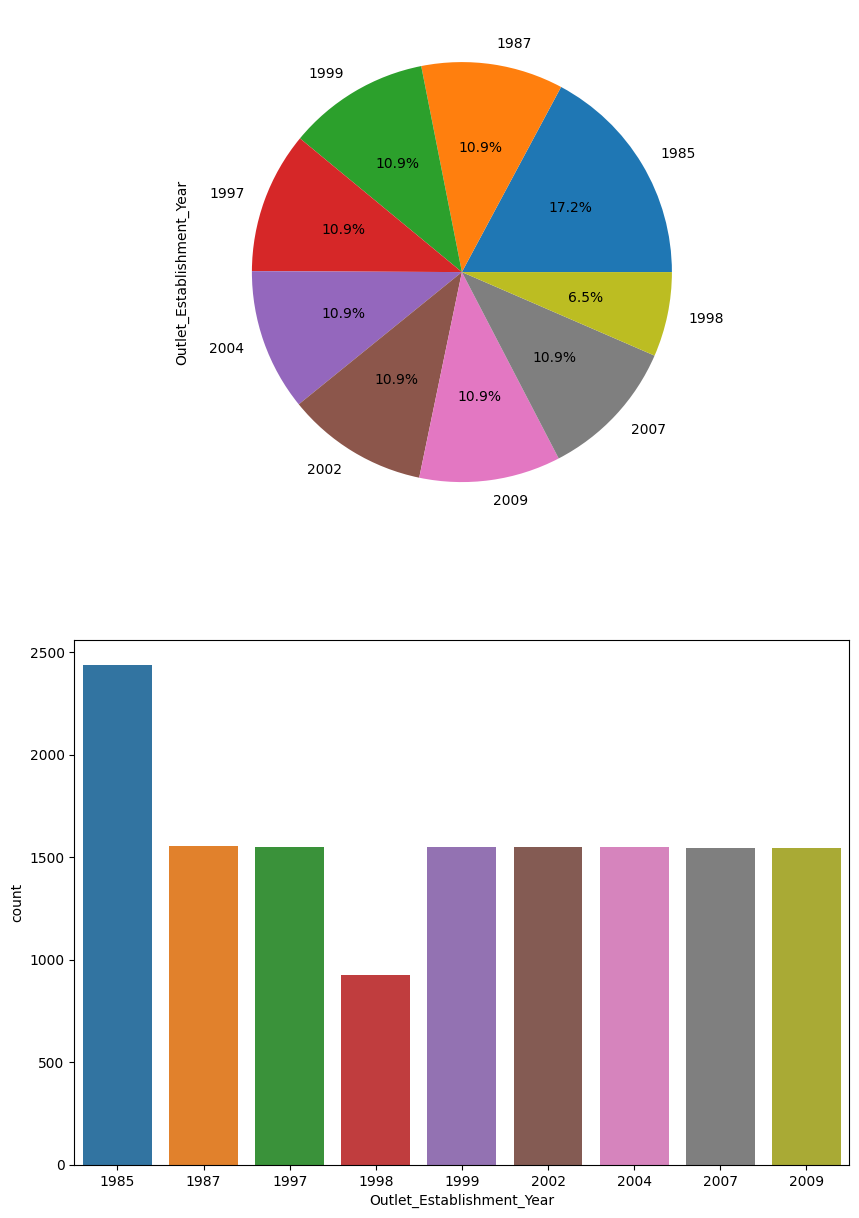

In [108]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df['Outlet_Establishment_Year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(2,1,2)
sns.countplot(data=df,x="Outlet_Establishment_Year")
df['Outlet_Establishment_Year'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

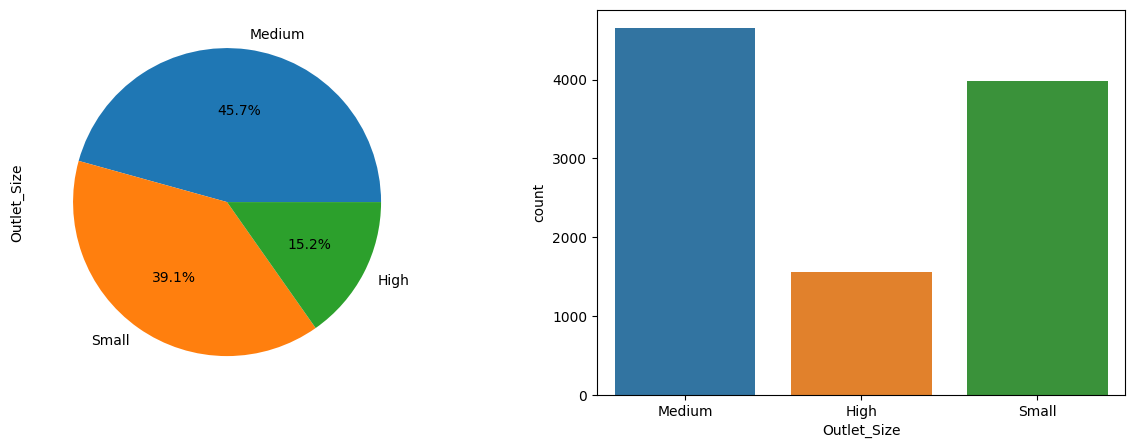

In [109]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data=df,x="Outlet_Size")
df['Outlet_Size'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

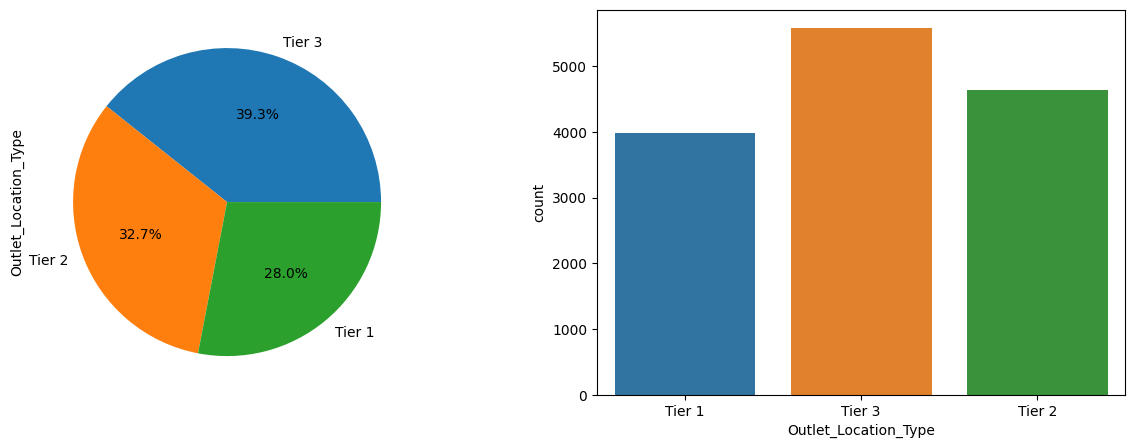

In [110]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data=df,x="Outlet_Location_Type")
df['Outlet_Location_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

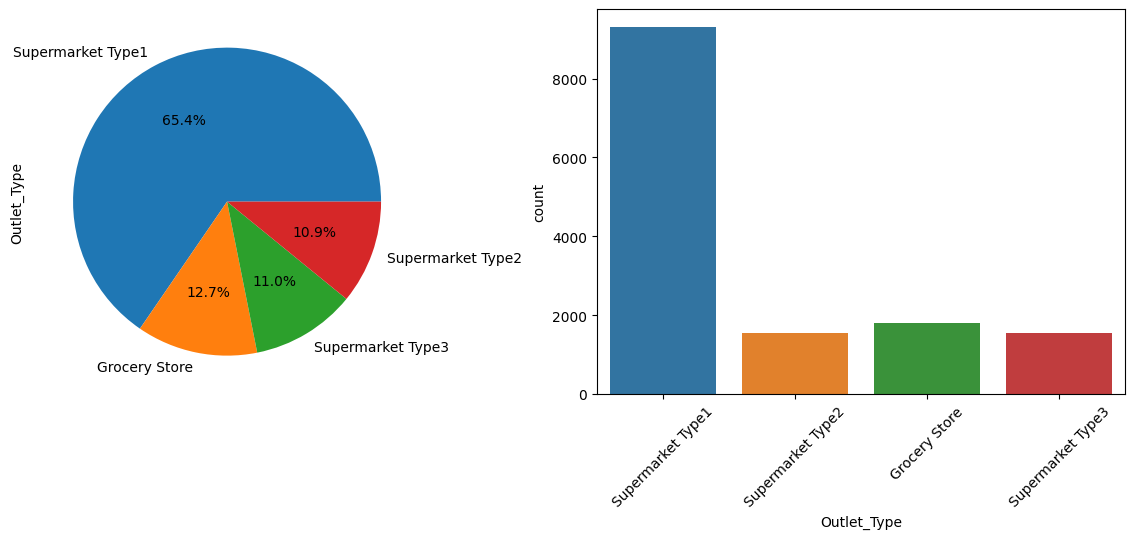

In [111]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data=df,x="Outlet_Type")
plt.xticks(rotation=45)
df['Outlet_Type'].value_counts()

##### b) Numeric Features 

In [112]:
print(NumFeatures)
cont = list(set(NumFeatures) - set(['Outlet_Establishment_Year', 'Item_Outlet_Sales']))
print(cont)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
['Item_MRP', 'Item_Visibility', 'Item_Weight']


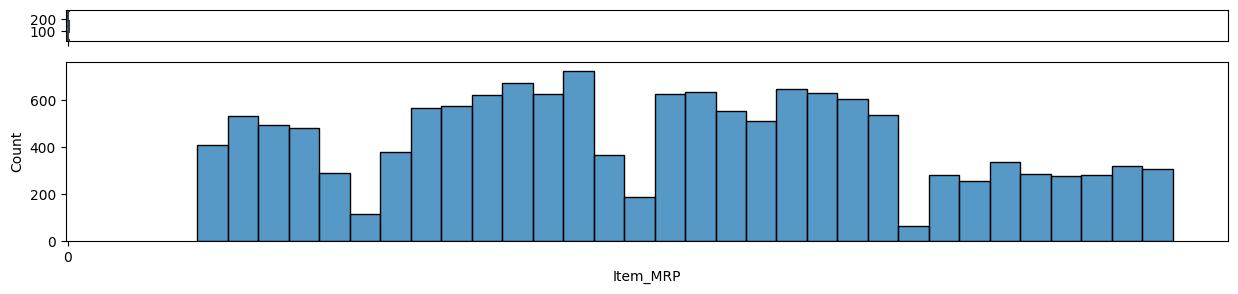

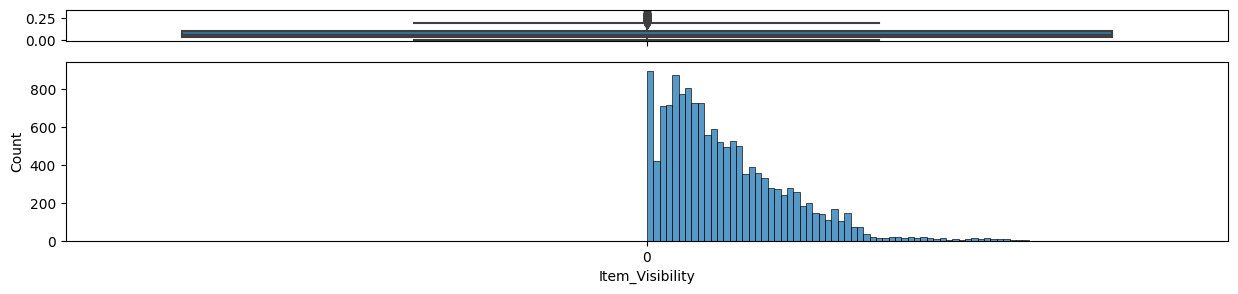

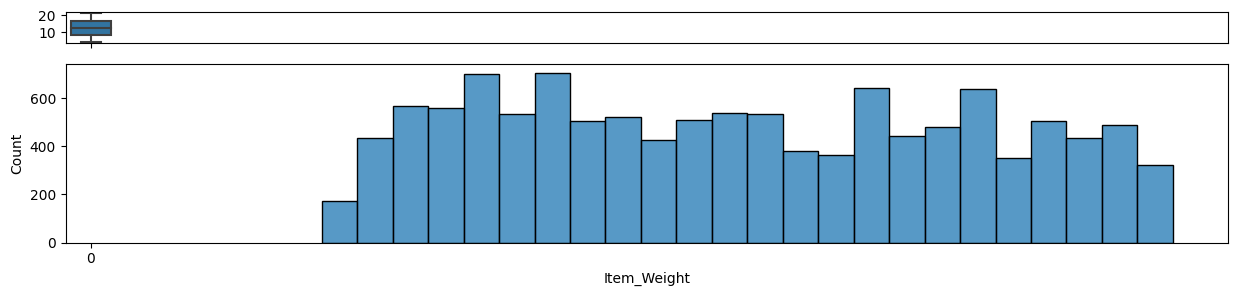

In [113]:
for feature in cont:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    f.set_figheight(3)
    f.set_figwidth(15)
    sns.boxplot(df[feature], ax=ax_box)
    sns.histplot(data=df, x=feature, ax=ax_hist)
    plt.show()

##### 2. Bivariate Analysis (Scatter plot b/w 2 features)

In [114]:
# Categorical vs Categorical : stripplot
# Categorical vs Numeric : stripplot
# Numeric vs Numeric : Scatter

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Type'>

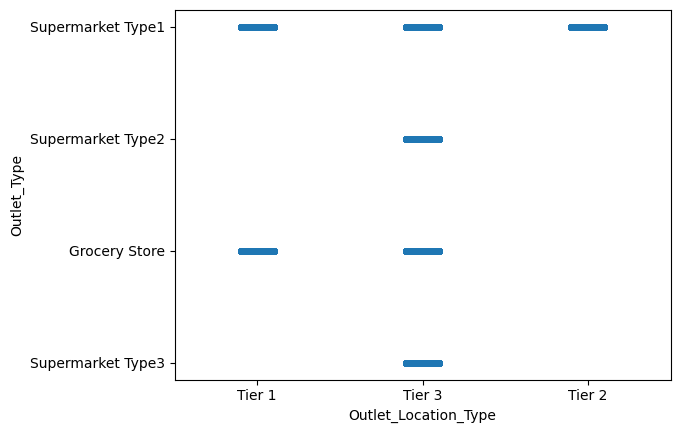

In [115]:
sns.stripplot(data=df,x='Outlet_Location_Type',y='Outlet_Type')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Type'>

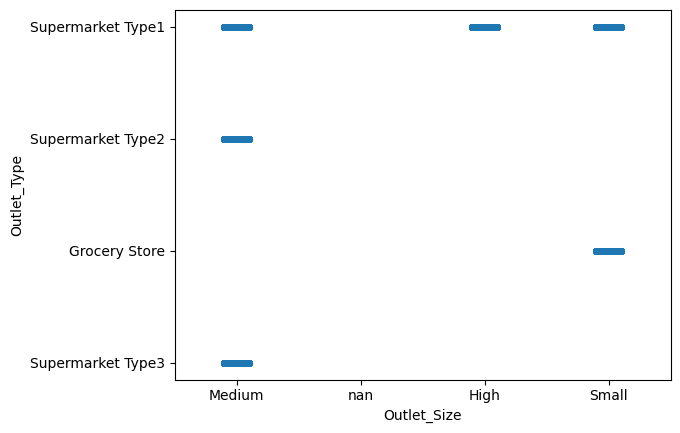

In [116]:
sns.stripplot(data=df,x='Outlet_Size',y='Outlet_Type')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

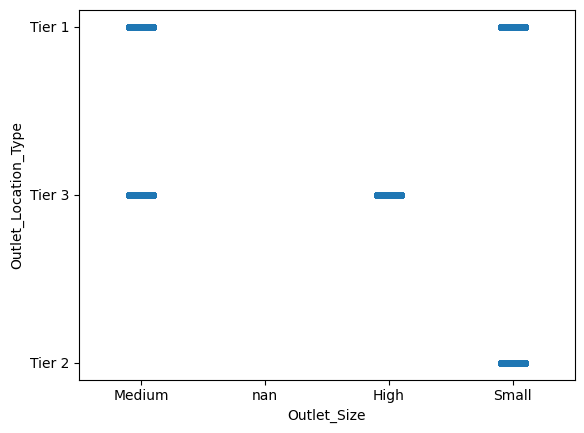

In [117]:
sns.stripplot(data=df,x='Outlet_Size',y='Outlet_Location_Type')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Type'>

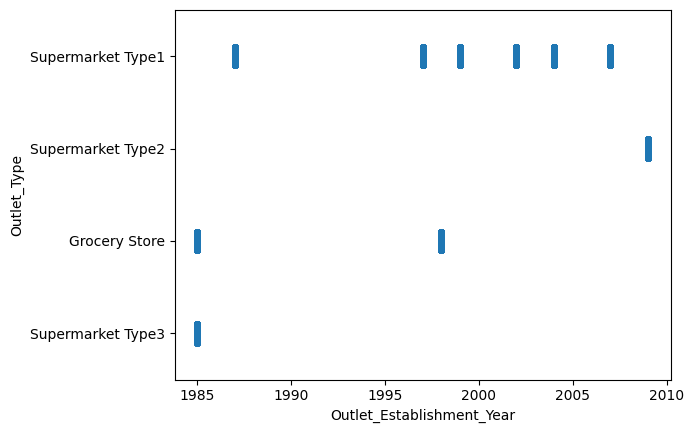

In [118]:
sns.stripplot(data=df,x='Outlet_Establishment_Year',y='Outlet_Type')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

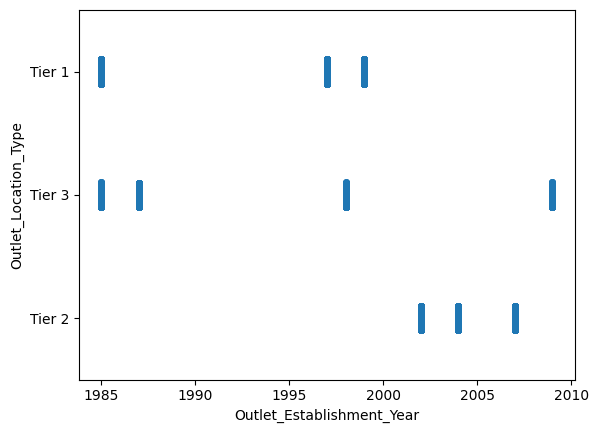

In [119]:
sns.stripplot(data=df,x='Outlet_Establishment_Year',y='Outlet_Location_Type')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Size'>

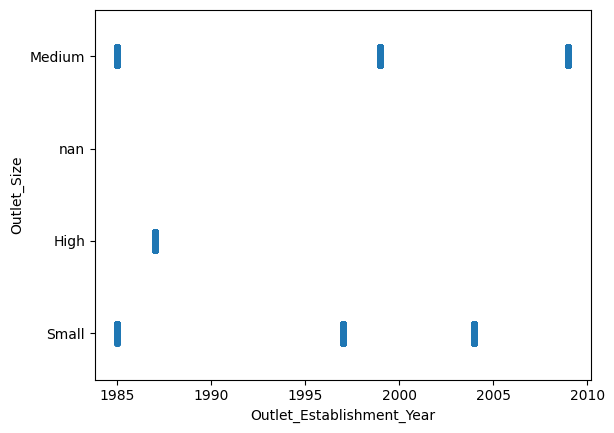

In [120]:
sns.stripplot(data=df,x='Outlet_Establishment_Year',y='Outlet_Size')

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Type'>

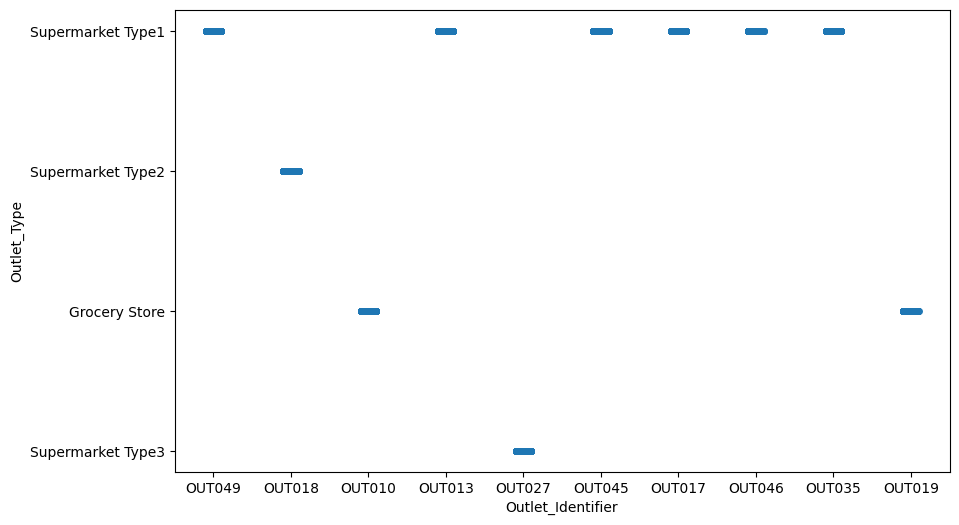

In [121]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df,x='Outlet_Identifier',y='Outlet_Type')

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Location_Type'>

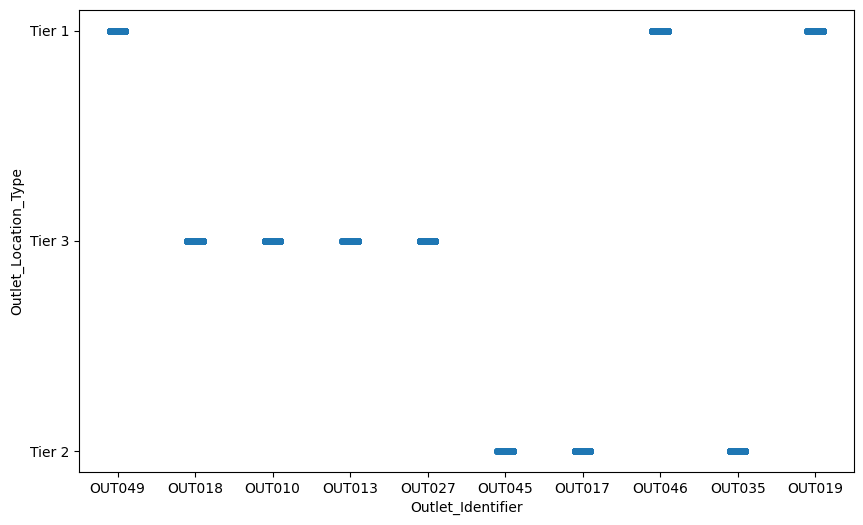

In [122]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df,x='Outlet_Identifier',y='Outlet_Location_Type')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Identifier'>

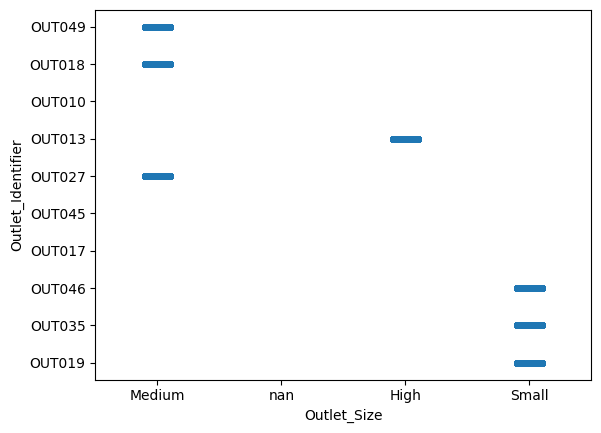

In [123]:
sns.stripplot(data=df,x='Outlet_Size',y='Outlet_Identifier')

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

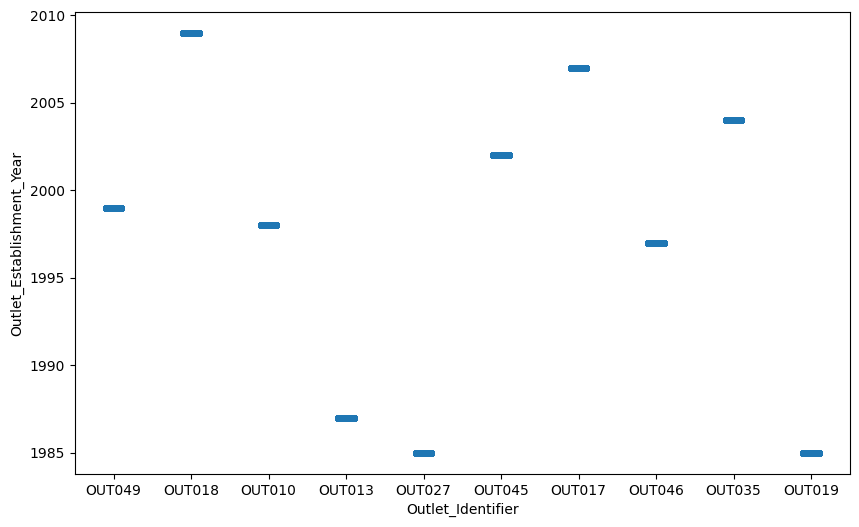

In [124]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df,x='Outlet_Identifier',y='Outlet_Establishment_Year')

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Visibility'>

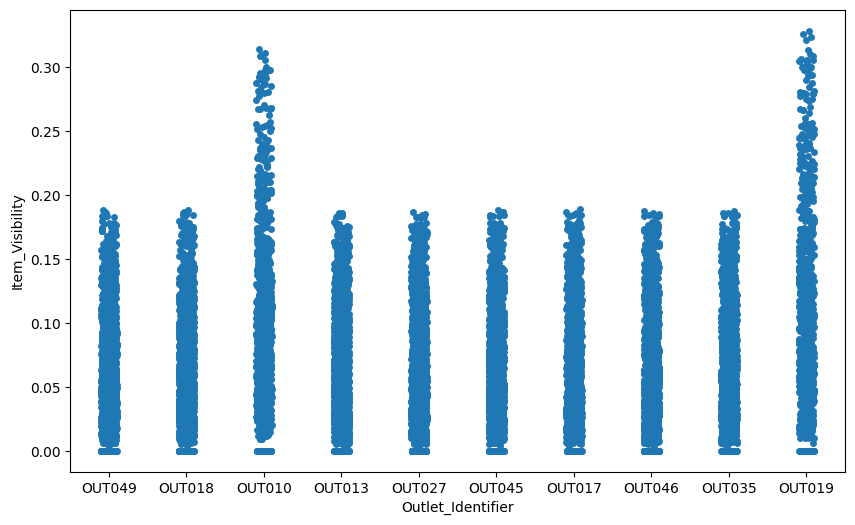

In [125]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df,x='Outlet_Identifier',y='Item_Visibility')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Visibility'>

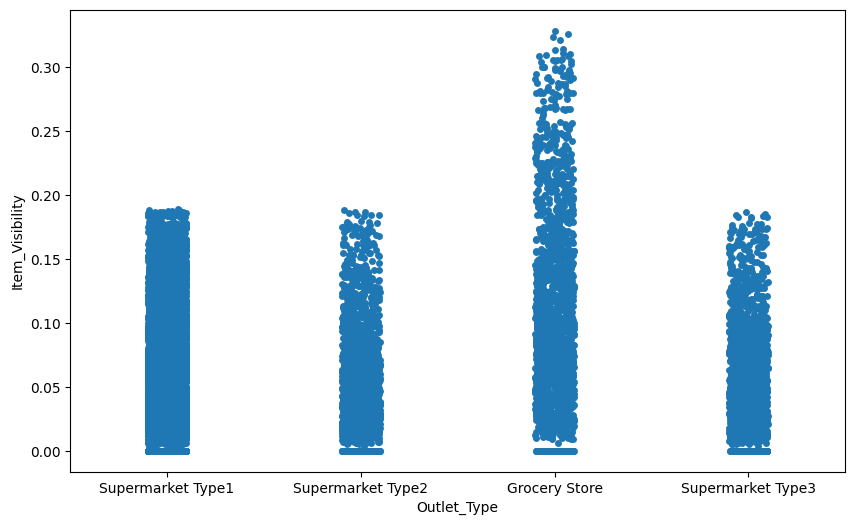

In [126]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df,x='Outlet_Type',y='Item_Visibility')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

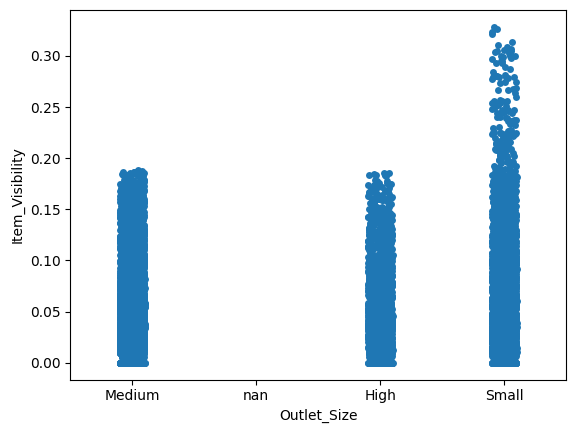

In [127]:
sns.stripplot(data=df,x='Outlet_Size',y='Item_Visibility')

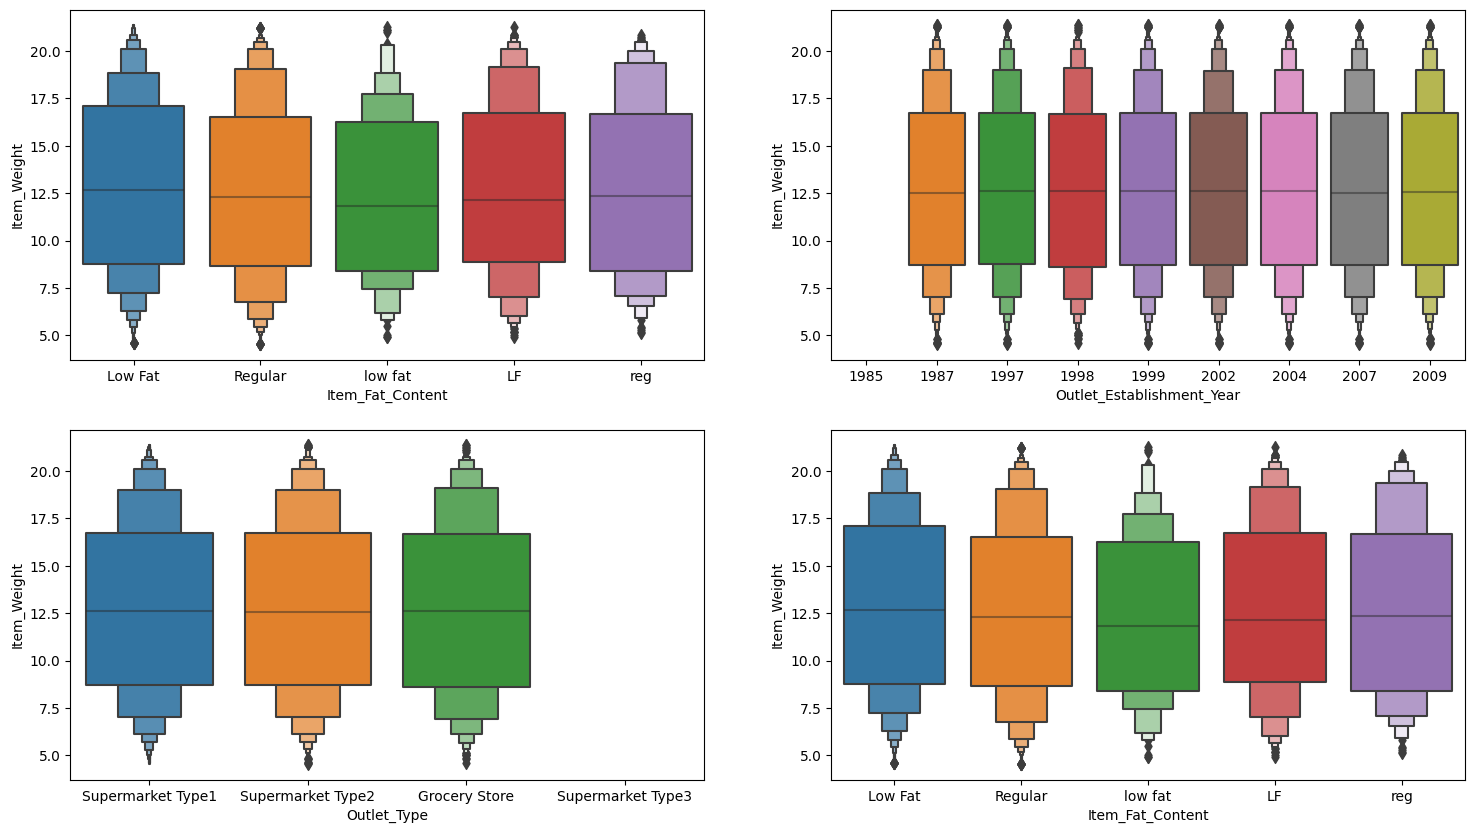

In [128]:
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i,n in enumerate(['Item_Fat_Content','Outlet_Establishment_Year','Outlet_Type','Item_Fat_Content']):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxenplot(x=df[n],y=df['Item_Weight'],ax=ax[r,c])
    c+=1

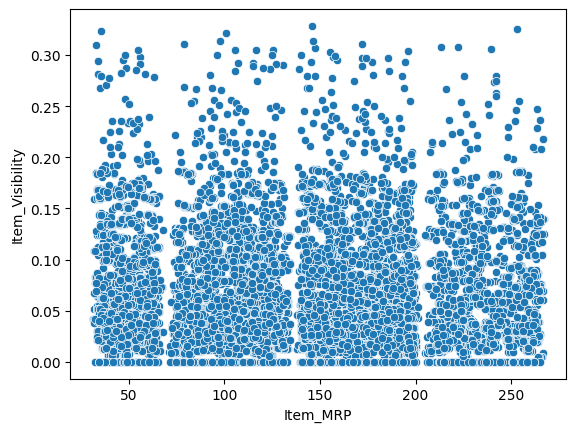

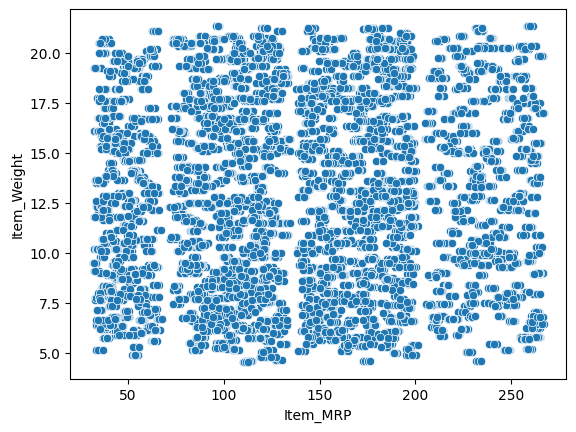

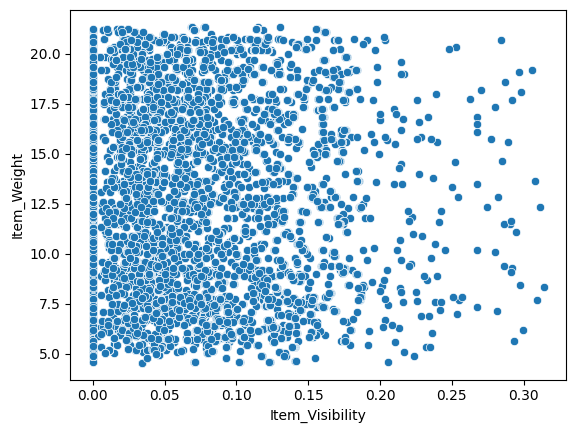

<Figure size 640x480 with 0 Axes>

In [129]:
for i in range(len(cont)):
    for j in range(i+1,len(cont)):
        sns.scatterplot(x=cont[i],y=cont[j],data=df)
        plt.figure()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

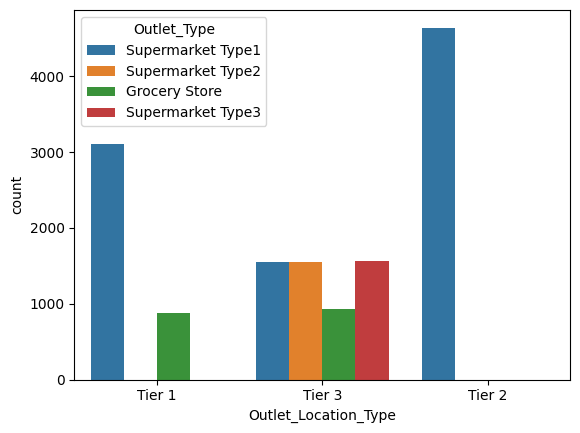

In [130]:
sns.countplot(data=df,x='Outlet_Location_Type',hue=df['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

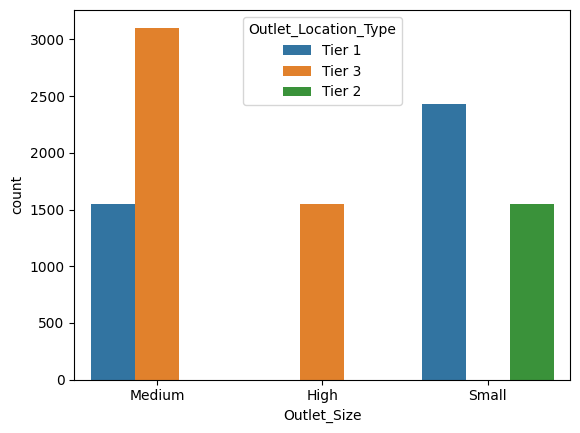

In [131]:
sns.countplot(data=df,x='Outlet_Size',hue=df['Outlet_Location_Type'])

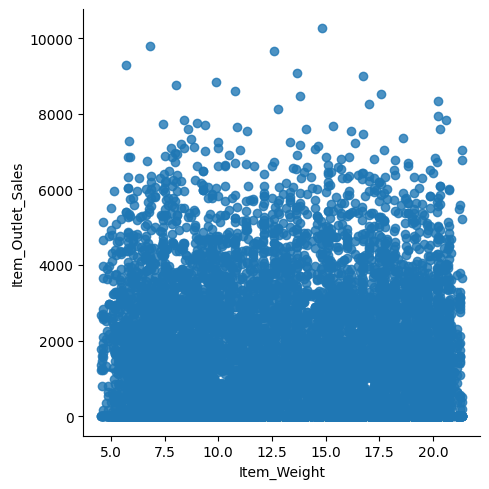

In [132]:
sns.lmplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)


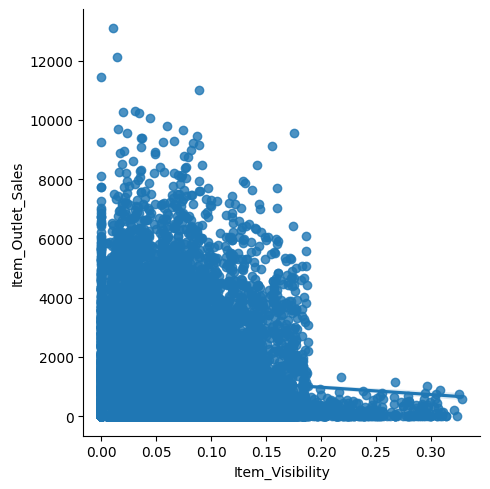

In [133]:
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

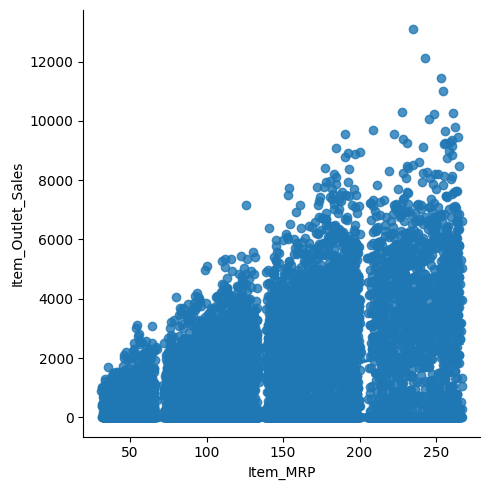

In [134]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

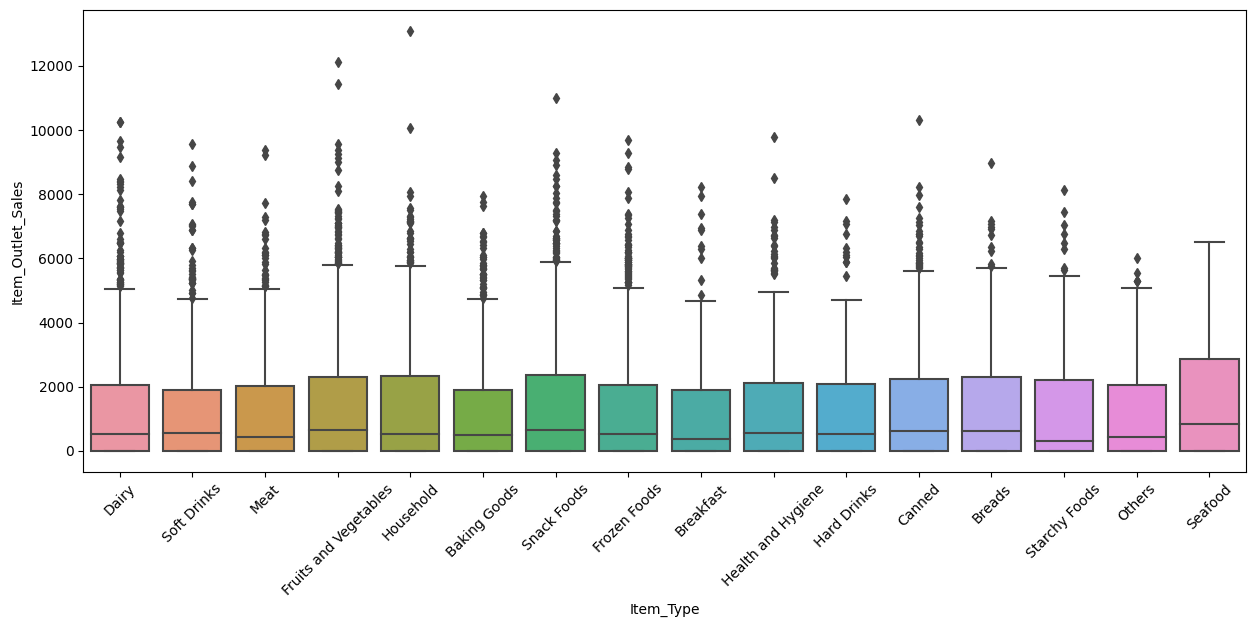

<Figure size 640x480 with 0 Axes>

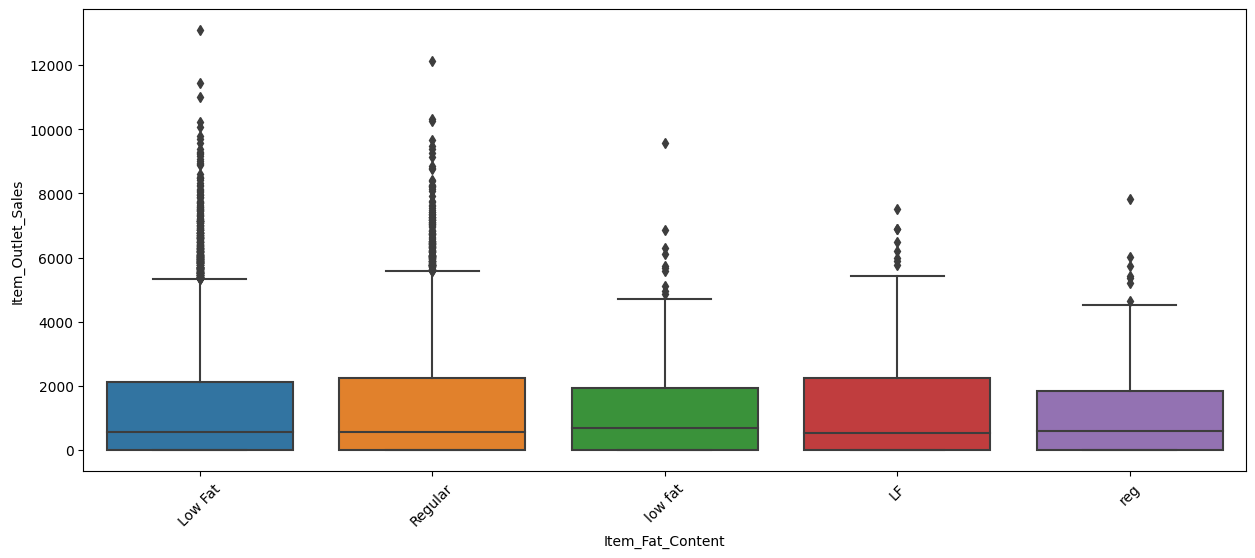

<Figure size 640x480 with 0 Axes>

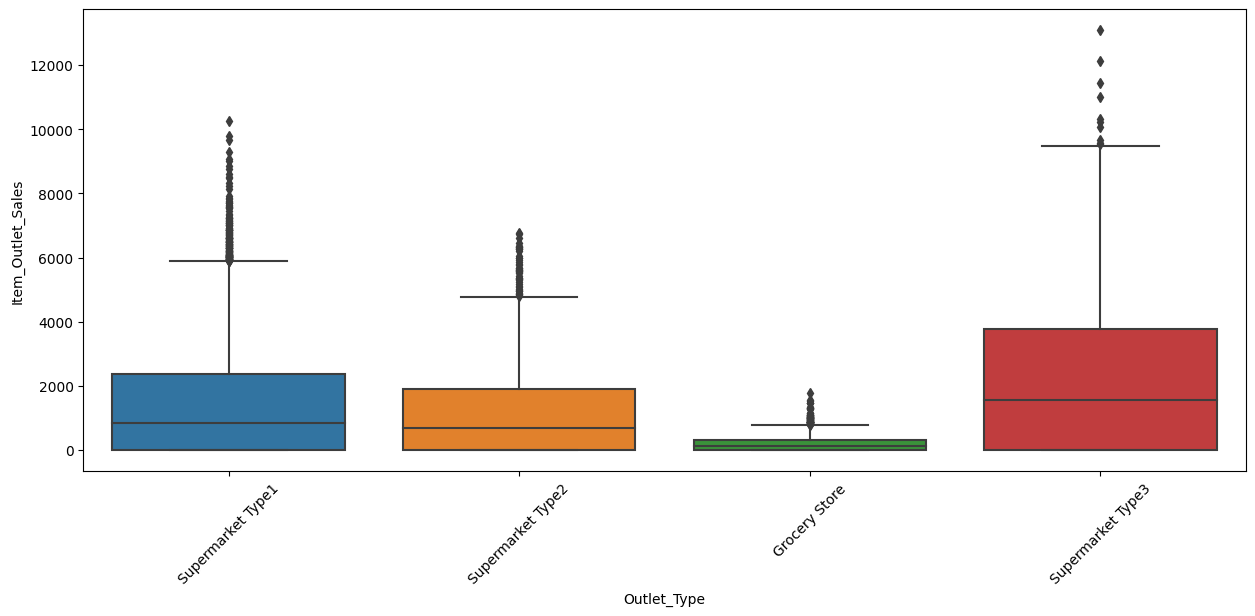

<Figure size 640x480 with 0 Axes>

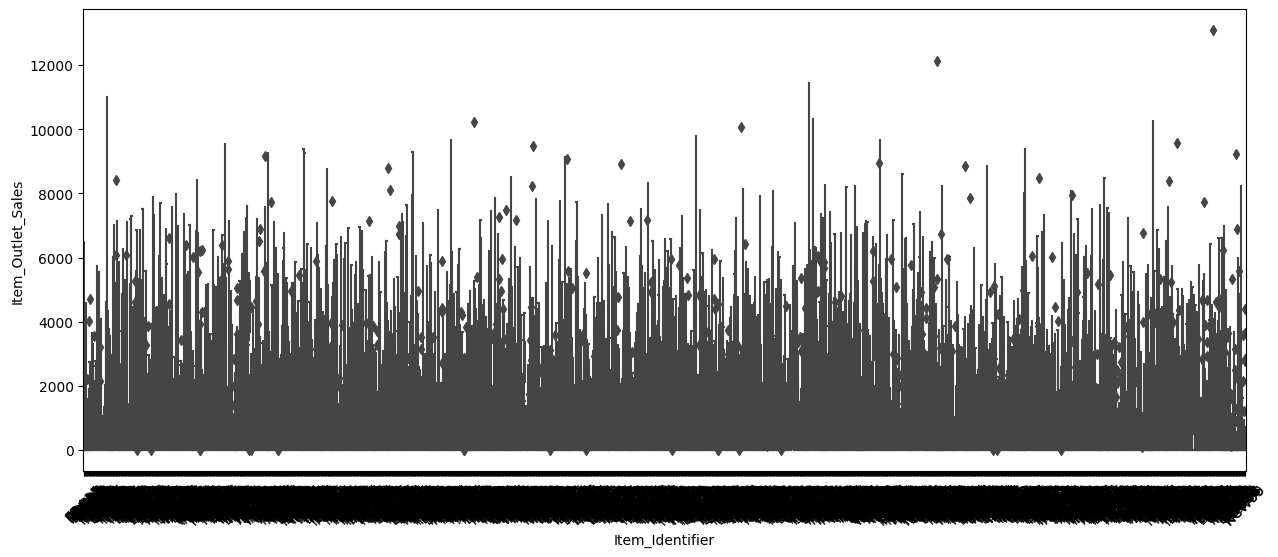

<Figure size 640x480 with 0 Axes>

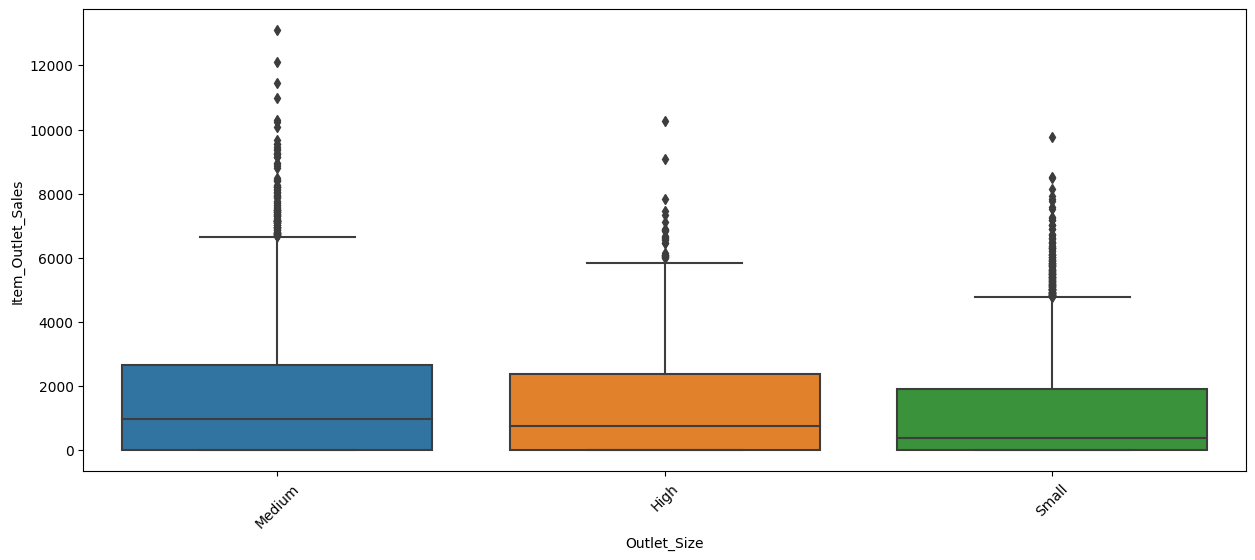

<Figure size 640x480 with 0 Axes>

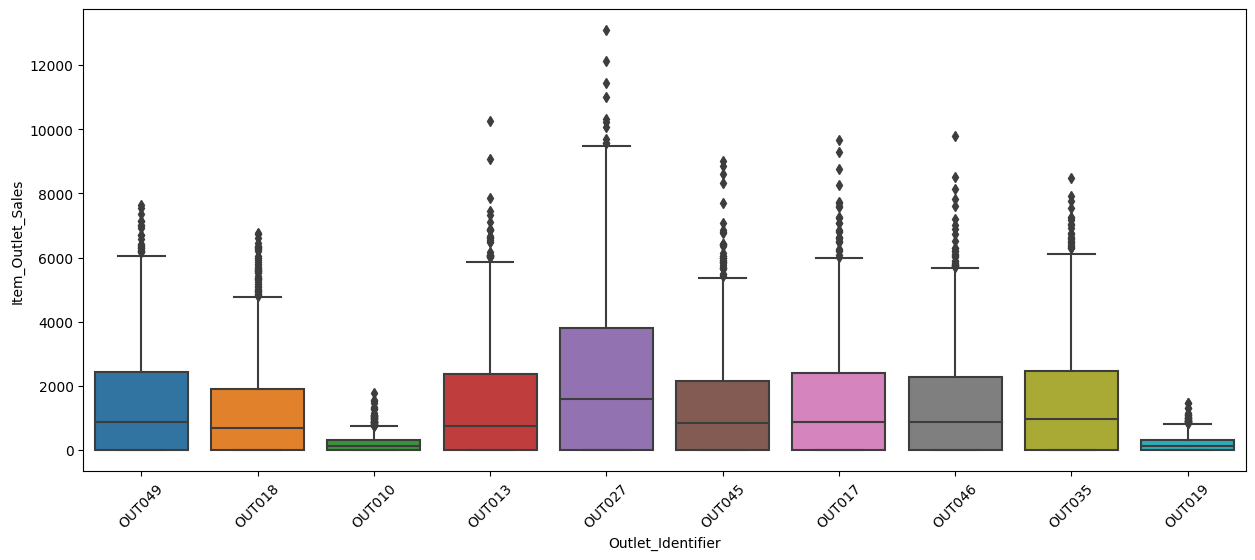

<Figure size 640x480 with 0 Axes>

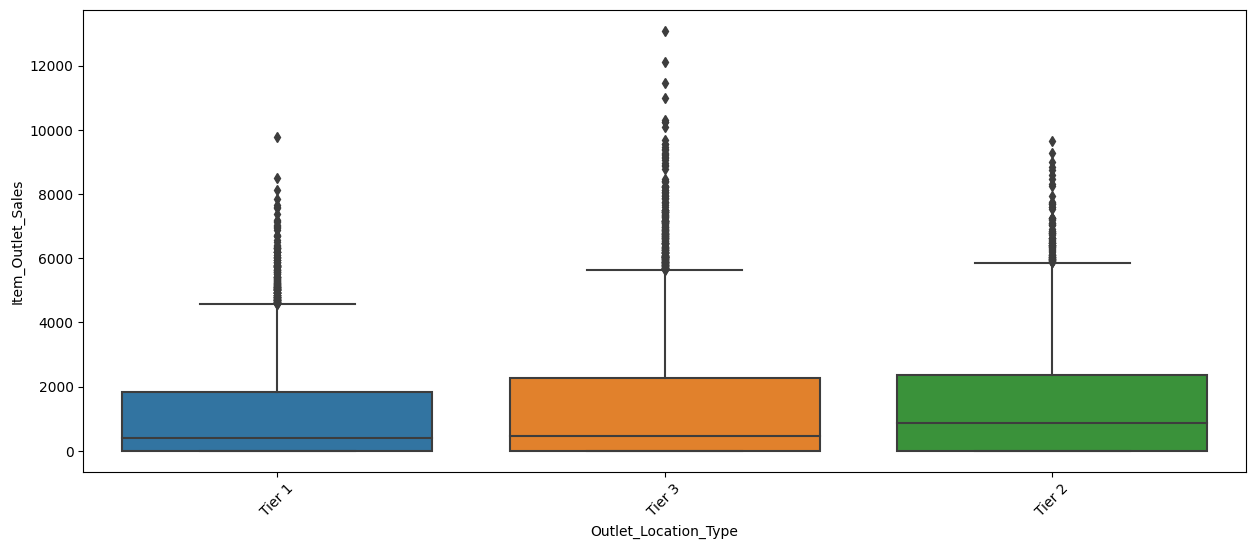

<Figure size 640x480 with 0 Axes>

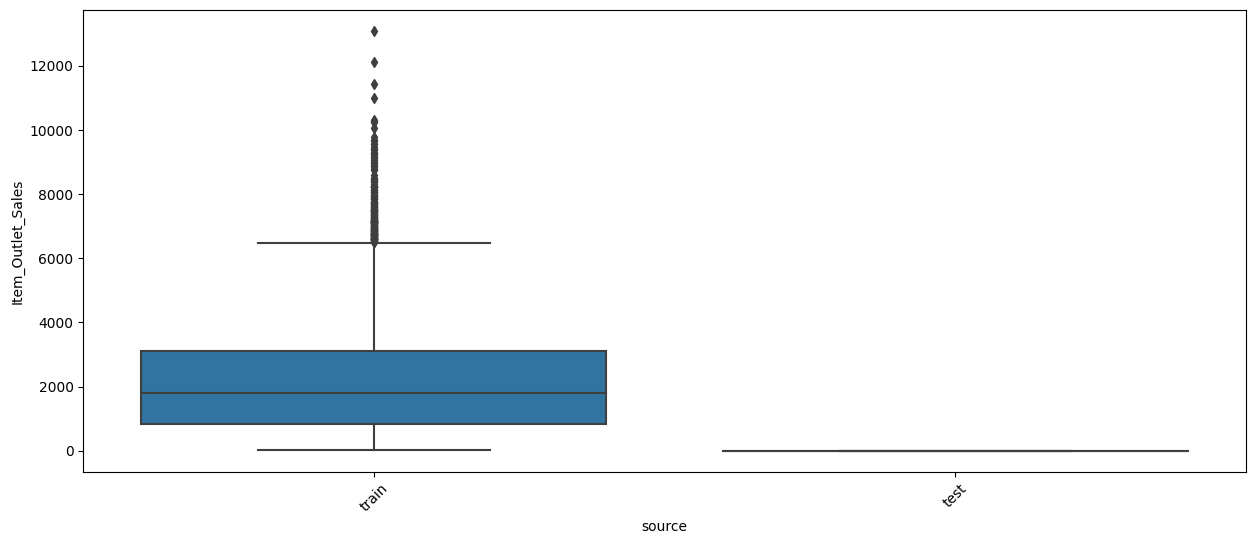

<Figure size 640x480 with 0 Axes>

In [135]:
for i in cat:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=df[i],y=df['Item_Outlet_Sales'])
    plt.xticks(rotation=45)
    plt.figure()

##### 3. Multivariate Analysis


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

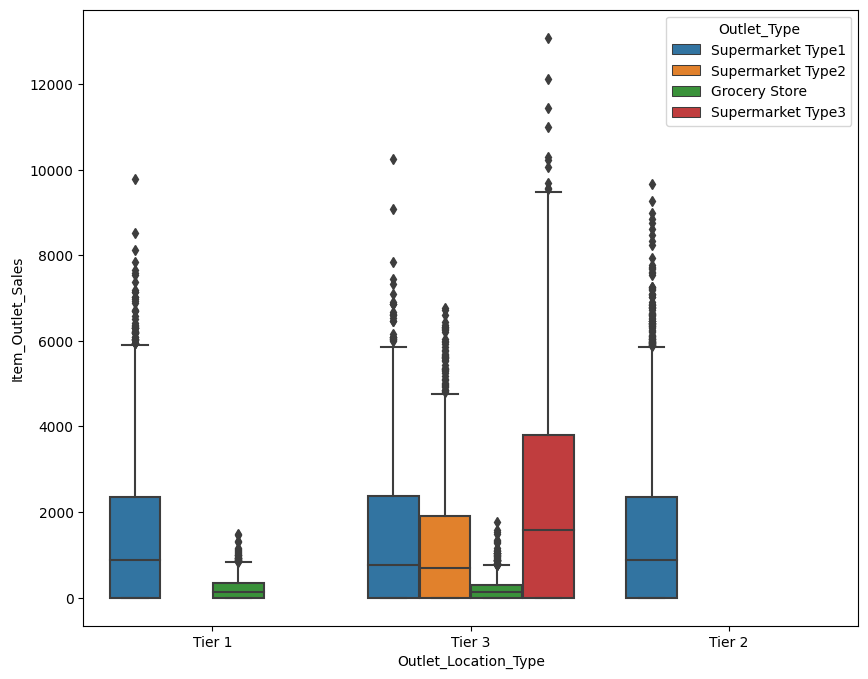

In [136]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

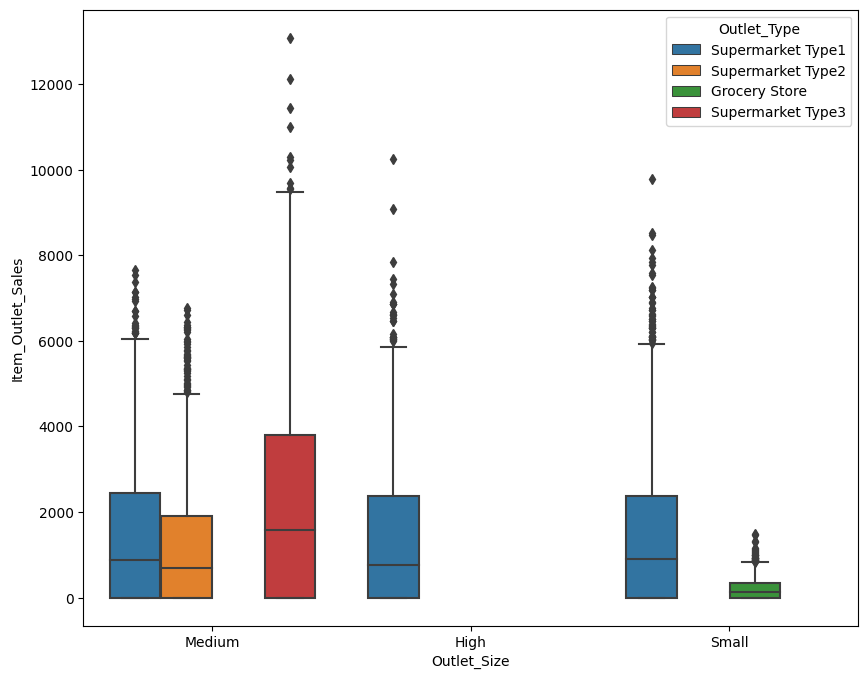

In [137]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Type',data=df)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

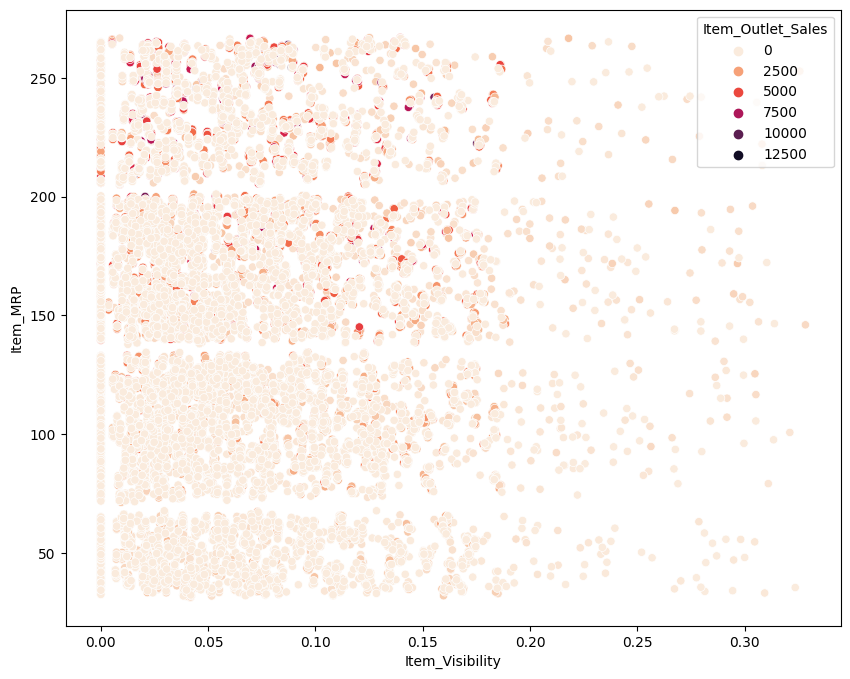

In [138]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item_Visibility',y='Item_MRP',hue='Item_Outlet_Sales',data=df,palette='rocket_r')

<AxesSubplot:>

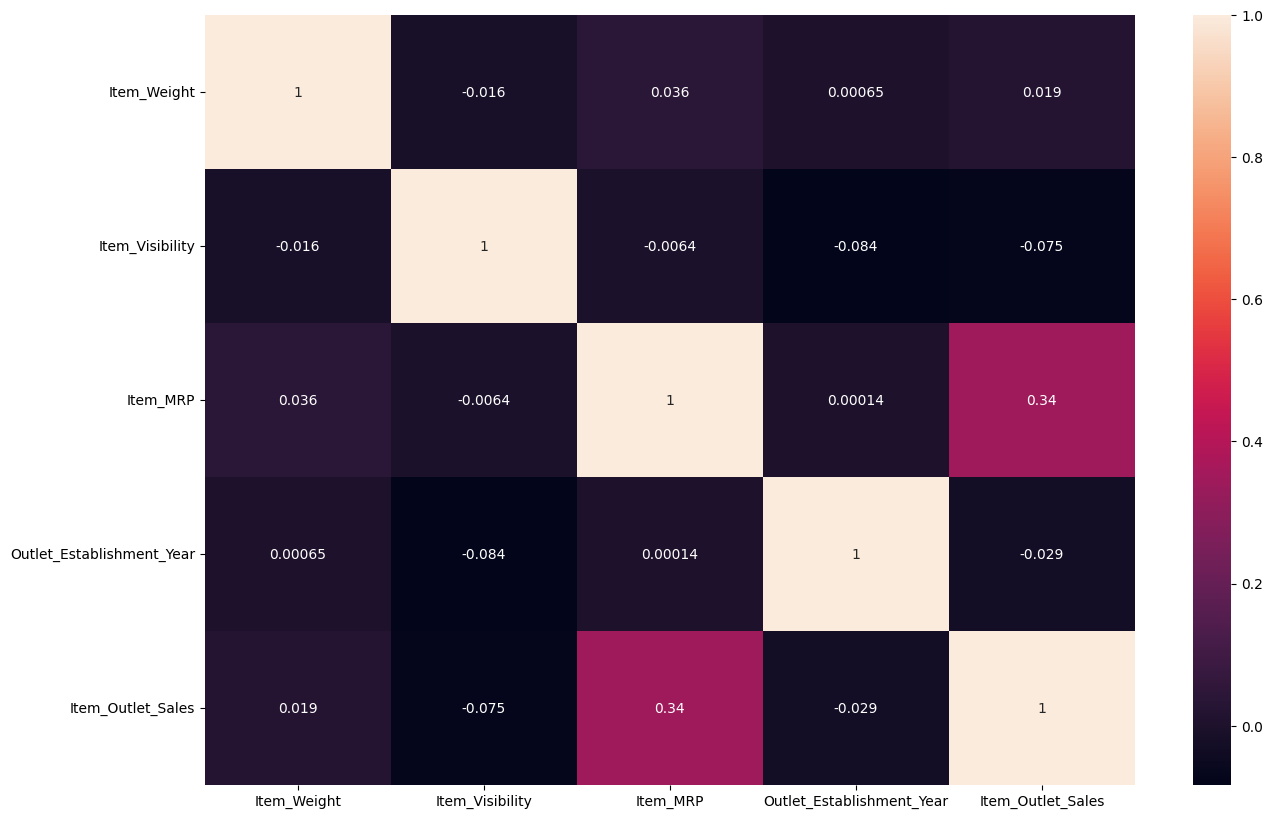

In [139]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### 3.8. Compute correlations b/w features

In [140]:
# Correlation Between Numeric with Numeric
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.019447
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.075008
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.019447,-0.075008,0.342781,-0.029489,1.000000


In [142]:
# Correlation Between Categorical with Categorical
import association_metrics as am
corrdf = df[CatFeatures].copy()
corrdf = corrdf.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)
cramersv = am.CramersV(corrdf) 
categoric_corr_matrix = cramersv.fit()
display(categoric_corr_matrix)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
Item_Identifier,1.000000,0.574985,1.000000,0.102063,0.073799,0.082409,0.120311,0.328087
Item_Fat_Content,0.574985,1.000000,0.215021,0.024022,0.015573,0.008796,0.015832,0.007133
Item_Type,1.000000,0.215021,1.000000,0.008476,0.007095,0.006881,0.011276,0.029976
Outlet_Identifier,0.102063,0.024022,0.008476,1.000000,1.000000,1.000000,1.000000,0.000275
Outlet_Size,0.073799,0.015573,0.007095,1.000000,1.000000,0.578765,0.552700,0.000094
Outlet_Location_Type,0.082409,0.008796,0.006881,1.000000,0.578765,1.000000,0.526540,0.000069
Outlet_Type,0.120311,0.015832,0.011276,1.000000,0.552700,0.526540,1.000000,0.000254
source,0.328087,0.007133,0.029976,0.000275,0.000094,0.000069,0.000254,1.000000


In [143]:
# Correlation Between Numeric with Categorical
# Encoding Categorical to Numeric OrderEncoding ?
# Then uding df.corr()
# Feature
# Feature 1 : A, B , C
# Feature 2 : U , H , M
# Feature 3 : X, Y , Z 

# mean({A,U,X} on Feature)
# mean({A,U,Y} on Feature)
table = df.pivot_table(values = feature, index = "Item_Type", columns = "Outlet_Type", aggfunc = "mean")
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2
Item_Type,,,
Baking Goods,12.525208,12.252736,12.257857
Breads,11.076167,11.159888,11.158333
Breakfast,15.006250,13.022500,13.022500
Canned,12.261136,12.340238,12.388571
Dairy,13.360845,13.219618,13.280968
Frozen Foods,12.853495,12.547904,12.526786
Fruits and Vegetables,13.135584,13.200374,13.195479
Hard Drinks,11.030200,11.613808,11.695769
Health and Hygiene,12.721545,13.199023,13.273913


# PART 4. PREPARE THE DATA 


### 4.1. Handling nan values


In [144]:
#Item_Visibility
df['Item_Visibility'].value_counts()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [145]:
#Replacing o visibility with nan values
df['Item_Visibility'].replace(0,np.nan,inplace=True)
df['Item_Visibility'].min()

0.003574698

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

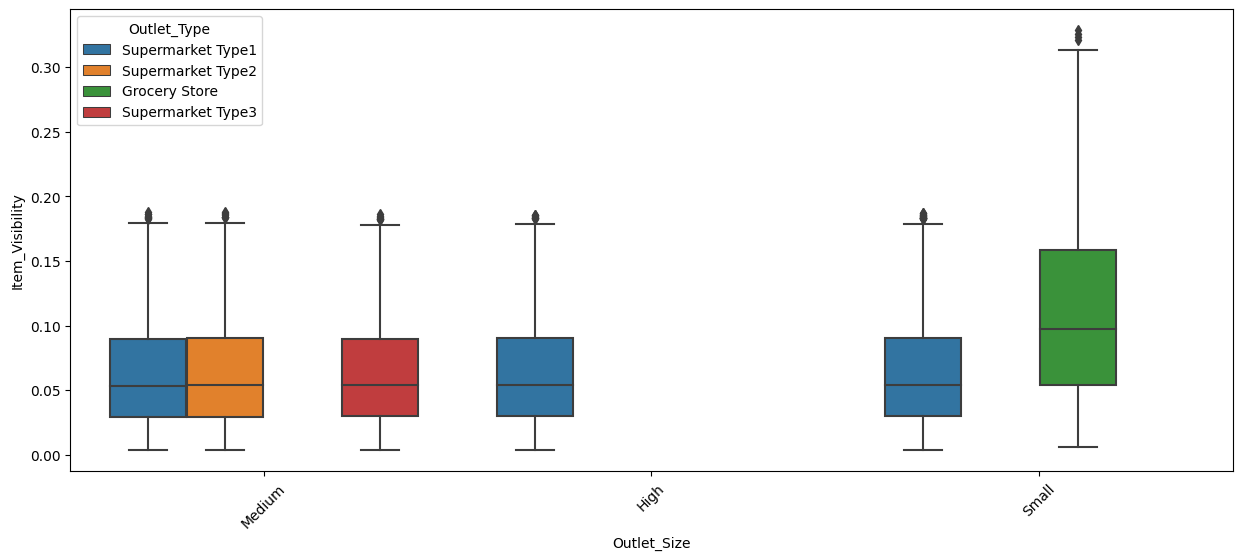

In [146]:
#Checking visibility in Outlet size with Outlet type
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Outlet_Size', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

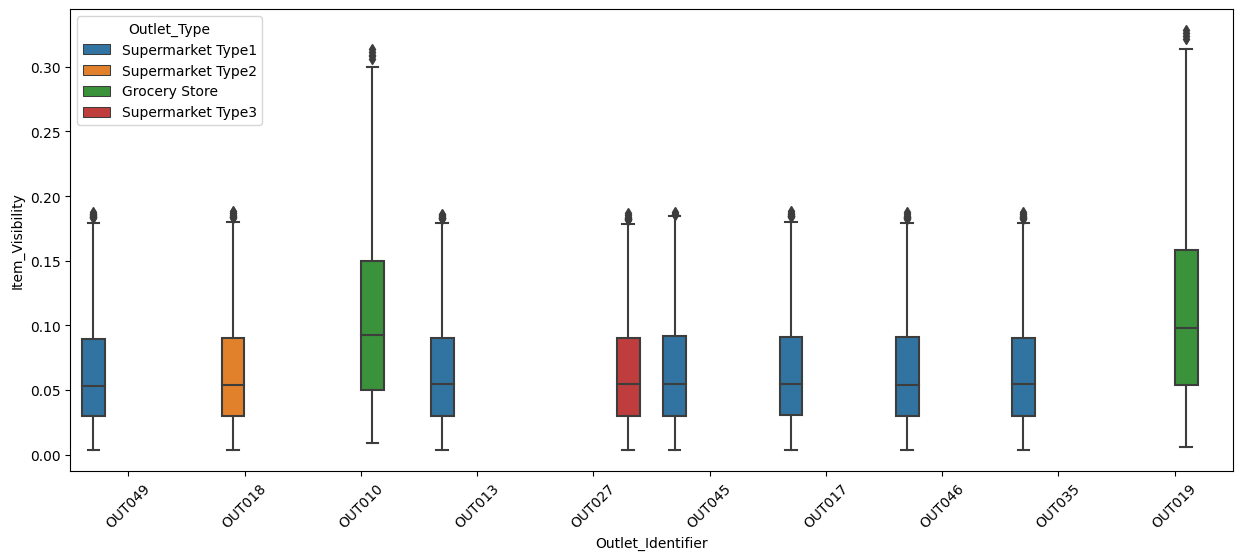

In [147]:
#Checking visibility in Outlet identifier with Outlet type
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Outlet_Identifier', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

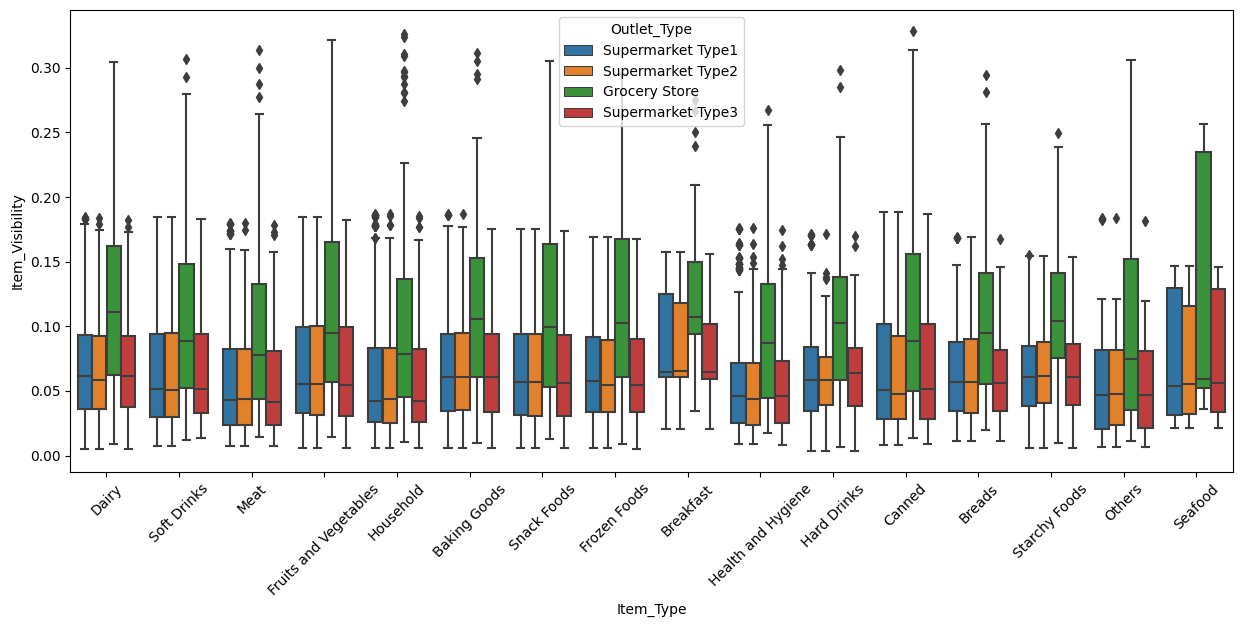

In [148]:
#Checking visibility in Item type with Outlet type
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=45)

In [149]:
#Creating pivot table to help fill nan values of visibility from here
table = df.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [150]:
#Creating pivot table to help fill nan values of visibility from here
table = df.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [151]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in visibility with mean values from above pivot table
df['Item_Visibility'].fillna(df[df['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

##### 1. Item_Weight

In [152]:
#we try to fill the nan values of wieht by using values from item identifier
wt_table = df.pivot_table(values='Item_Weight', index='Item_Identifier')
wt_table

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [153]:
def find_wt(x):
    return wt_table.loc[x['Item_Identifier'],'Item_Weight']

df['Item_Weight'].fillna(df[df['Item_Weight'].isnull()].apply(find_wt, axis=1), inplace=True)

##### 2. Outlet_Size

In [154]:
df['Outlet_Size'].replace(np.NaN,'Unknown',inplace=True)
from scipy.stats import mode
size_table = df.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
size_table

C:\Users\TRI PC\AppData\Local\Temp\ipykernel_71940\3796701475.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  size_table = df.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
c:\Users\TRI PC\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


,Outlet_Size
Outlet_Type,
Grocery Store,Unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


<AxesSubplot:>

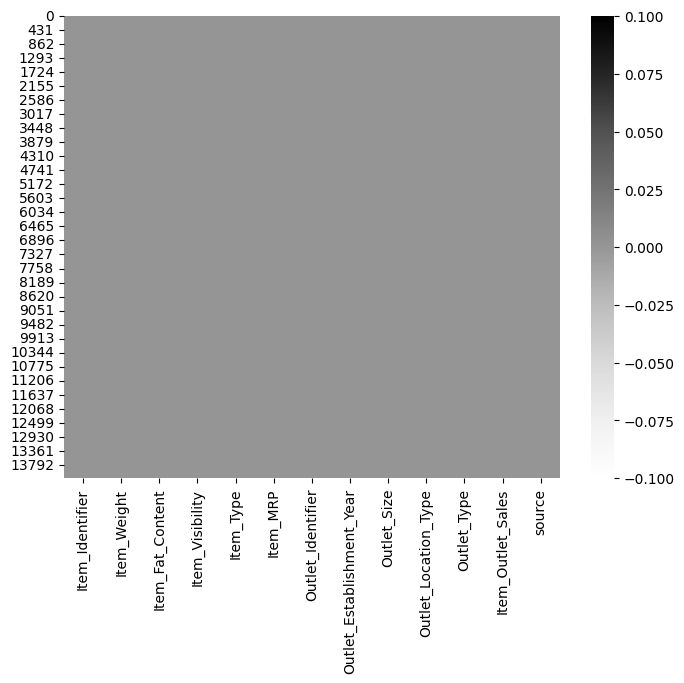

In [155]:
#Filling nan values with mode
df['Outlet_Size'].replace('Unknown','Small',inplace=True)

plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='Greys')

##### 3. Item_Identifier

In [156]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[:-2])
df['Item_Identifier'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [157]:
#Correcting year column by subtracting it from 2021
df['Outlet_Establishment_Year']=(2021.0-df['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,22.0,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,12.0,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,22.0,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX,19.20,Regular,0.114820,Fruits and Vegetables,182.0950,OUT010,23.0,Small,Tier 3,Grocery Store,732.3800,train
4,NCD,8.93,Low Fat,0.057774,Household,53.8614,OUT013,34.0,High,Tier 3,Supermarket Type1,994.7052,train


In [158]:
#Merging all the low fat categories to Low fat and regular categories to Regular
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [159]:
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### 4.2. Encoding categorical features

In [160]:
#Using Ordinal Encoder for encoding object type values
from sklearn.preprocessing import OrdinalEncoder
e=OrdinalEncoder()
obj=[feature for feature in df.columns if df[feature].dtypes=='O' and feature!='source']
obj

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [161]:
for i in obj:
    df[i]=e.fit_transform(df[i].values.reshape(-1,1))
df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
source                        object
dtype: object

### 4.3. Removing outliers from Visibiltiy column

In [162]:
df=df[np.abs(df.Item_Visibility-df.Item_Visibility.mean())<=(3*df.Item_Visibility.std())]
df.shape

(14023, 13)

<AxesSubplot:>

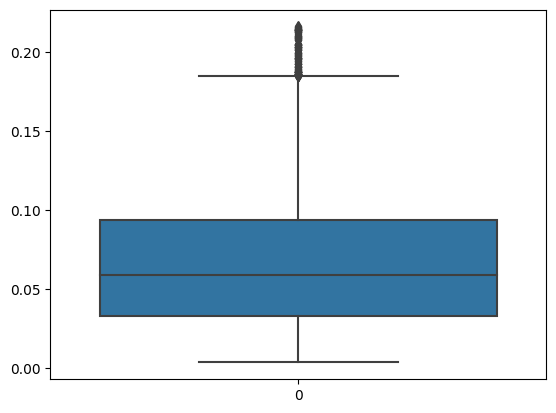

In [163]:
sns.boxplot(df['Item_Visibility'])

### 4.4. Removing skewness from visibility column

In [164]:
df['Item_Visibility'].skew()

0.8492005168606449

In [165]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])
df['Item_Visibility'].skew()

C:\Users\TRI PC\AppData\Local\Temp\ipykernel_71940\2682985897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Visibility']=np.sqrt(df['Item_Visibility'])


0.21330304743134376

C:\Users\TRI PC\AppData\Local\Temp\ipykernel_71940\852521860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

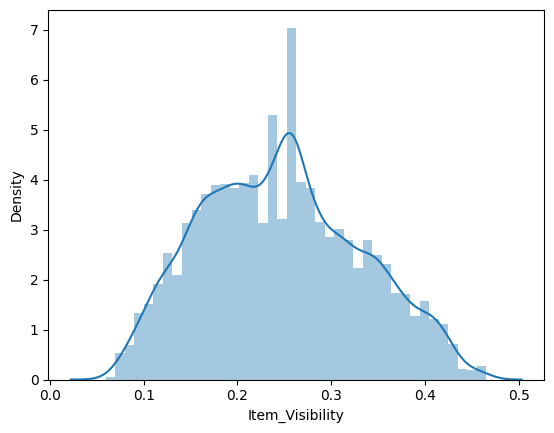

In [166]:
sns.distplot(df['Item_Visibility'])

### 4.5. Scaling the data

In [167]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

df.iloc[:,:-2]=m.fit_transform(df.iloc[:,:-2])

C:\Users\TRI PC\AppData\Local\Temp\ipykernel_71940\589361078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,:-2]=m.fit_transform(df.iloc[:,:-2])


### 4.6. Separating the data into train and test

In [168]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

train.drop('source',axis=1,inplace=True)
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

train

C:\Users\TRI PC\AppData\Local\Temp\ipykernel_71940\4271689999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('source',axis=1,inplace=True)
C:\Users\TRI PC\AppData\Local\Temp\ipykernel_71940\4271689999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.271429,0.282525,0.0,0.164962,0.266667,0.927507,1.000000,0.416667,0.5,0.0,0.333333,3735.1380
1,0.028571,0.081274,1.0,0.194970,0.933333,0.072068,0.333333,0.000000,0.5,1.0,0.666667,443.4228
2,0.457143,0.770765,0.0,0.171824,0.666667,0.468288,1.000000,0.416667,0.5,0.0,0.333333,2097.2700
3,0.600000,0.871986,1.0,0.688223,0.400000,0.640093,0.000000,0.458333,1.0,1.0,0.000000,732.3800
4,0.685714,0.260494,0.0,0.445327,0.600000,0.095805,0.111111,0.916667,0.0,1.0,0.333333,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.342857,0.137541,0.0,0.440225,0.866667,0.777729,0.111111,0.916667,0.0,1.0,0.333333,2778.3834
8421,0.528571,0.227746,1.0,0.387107,0.000000,0.326263,0.777778,0.291667,1.0,0.5,0.333333,549.2850
8422,0.771429,0.359929,0.0,0.315158,0.533333,0.228492,0.666667,0.208333,1.0,0.5,0.333333,1193.1136
8423,0.457143,0.158083,1.0,0.792362,0.866667,0.304939,0.333333,0.000000,0.5,1.0,0.666667,1845.5976


In [169]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.585714,0.964275,0.0,0.067049,0.866667,0.325012,1.000000,0.416667,0.5,0.0,0.333333
1,0.585714,0.222983,1.0,0.335997,0.266667,0.237819,0.222222,0.083333,1.0,0.5,0.333333
2,0.828571,0.598095,0.0,0.630769,0.733333,0.893316,0.000000,0.458333,1.0,1.0,0.000000
3,0.500000,0.164335,0.0,0.158480,0.866667,0.525233,0.222222,0.083333,1.0,0.5,0.333333
4,0.614286,0.538553,1.0,0.701863,0.266667,0.861381,0.555556,1.000000,0.5,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
5593,0.285714,0.353974,1.0,0.139058,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333
5594,0.314286,0.181304,1.0,0.785119,1.000000,0.585126,0.333333,0.000000,0.5,1.0,0.666667
5595,0.842857,0.324204,0.0,0.521286,0.533333,0.371199,0.777778,0.291667,1.0,0.5,0.333333
5596,0.400000,0.639774,1.0,0.486929,0.200000,0.778154,0.222222,0.083333,1.0,0.5,0.333333


# PART 5. TRAIN AND EVALUATE MODELS 


### 5.1. Modelling Phase

In [170]:
from sklearn.model_selection import train_test_split,cross_val_score

#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [171]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [172]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=0
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.2,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        r2=r2_score(p,ytest)
        if maxx<r2:
            maxx=r2
            j=state
    return j

In [173]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [174]:
def performance(p,ytest,s,n):
    print(m)
    print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
    print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
    print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
    print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
    print('Mean of cross validaton Score is',np.round(np.mean(s),4))
    print('--------------------------------------------------------------------------')

In [175]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.2,random_state=randomstate(x,y))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),4)*100)
        mcv.append(np.round(np.mean(score),4)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [176]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,809.6622,1.301844e+06,1140.9836,26.14,50.28
LinearRegression,886.4671,1.370332e+06,1170.6120,13.49,49.79
Lasso,885.4656,1.368904e+06,1170.0017,12.70,49.82
Ridge,886.2023,1.369934e+06,1170.4417,13.16,49.79
ElasticNet,1212.1723,2.344823e+06,1531.2815,-7167.95,12.60
DecisionTreeRegressor,1096.0882,2.494819e+06,1579.4995,20.65,16.69
RandomForestRegressor,780.8235,1.235631e+06,1111.5893,35.68,54.93
AdaBoostRegressor,1012.5885,1.601314e+06,1265.4304,-10.13,44.43
GradientBoostingRegressor,742.8922,1.122272e+06,1059.3733,37.59,58.73


### 5.2. Feature Selection

##### 1. Using ANOVA test

In [177]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selection = SelectKBest(score_func=f_classif)
fit = selection.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores

,Features,Score
0,Item_Identifier,1.129296
1,Item_Weight,1.135301
2,Item_Fat_Content,1.164510
3,Item_Visibility,1.167628
4,Item_Type,1.195552
5,Item_MRP,3.497038
6,Outlet_Identifier,1.190374
7,Outlet_Establishment_Year,1.213252
8,Outlet_Size,1.059711
9,Outlet_Location_Type,1.037075


In [178]:
featureScores.sort_values(by=['Score'],ascending=False)

,Features,Score
5,Item_MRP,3.497038
10,Outlet_Type,2.105619
7,Outlet_Establishment_Year,1.213252
4,Item_Type,1.195552
6,Outlet_Identifier,1.190374
3,Item_Visibility,1.167628
2,Item_Fat_Content,1.164510
1,Item_Weight,1.135301
0,Item_Identifier,1.129296
8,Outlet_Size,1.059711


##### 2. Using feature importances of Extra trees regressor


In [179]:
#Using feature importances of Extra trees regressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

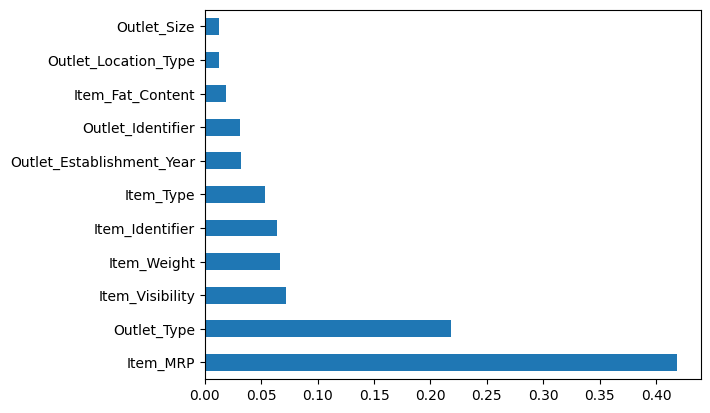

In [180]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [181]:
fi=list(feat_importances.nlargest(11).index)
fi

['Item_MRP',
 'Outlet_Type',
 'Item_Visibility',
 'Item_Weight',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Item_Fat_Content',
 'Outlet_Location_Type',
 'Outlet_Size']

##### 3. Using Lasso Coeficients


In [182]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,y)
print(m1.best_params_)

c:\Users\TRI PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.266e+09, tolerance: 2.188e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\TRI PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.324e+09, tolerance: 2.187e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\TRI PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

{'alpha': 1}


In [183]:
m1=Lasso(alpha=1)
m1.fit(x,y)

Lasso(alpha=1)

In [184]:
importance = np.abs(m1.coef_)

dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,Item_Identifier,1.390688
1,Item_Weight,0.398274
2,Item_Fat_Content,54.623804
3,Item_Visibility,260.407711
4,Item_Type,0.000000
5,Item_MRP,3689.411377
6,Outlet_Identifier,482.277225
7,Outlet_Establishment_Year,7.023098
8,Outlet_Size,248.076053
9,Outlet_Location_Type,231.696856


In [185]:
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
5,Item_MRP,3689.411377
10,Outlet_Type,2483.451777
6,Outlet_Identifier,482.277225
3,Item_Visibility,260.407711
8,Outlet_Size,248.076053
9,Outlet_Location_Type,231.696856
2,Item_Fat_Content,54.623804
7,Outlet_Establishment_Year,7.023098
0,Item_Identifier,1.390688
1,Item_Weight,0.398274


### 5.3. Conclusion

In [186]:
x1=x.drop('Outlet_Location_Type',axis=1)
x2=x.drop('Item_Type',axis=1)
x3=x.drop(['Outlet_Location_Type','Item_Type'],axis=1)

In [187]:
#Testing x1 dataset
createmodels(models,x1,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,808.3956,1.301318e+06,1140.7533,26.37,50.36
LinearRegression,887.1898,1.373900e+06,1172.1349,13.30,49.72
Lasso,886.1188,1.372222e+06,1171.4188,12.52,49.75
Ridge,886.8998,1.373430e+06,1171.9341,12.97,49.72
ElasticNet,1213.0091,2.350025e+06,1532.9791,-7719.87,12.42
DecisionTreeRegressor,1096.9713,2.492281e+06,1578.6961,22.66,16.94
RandomForestRegressor,780.8840,1.242480e+06,1114.6657,35.38,54.36
AdaBoostRegressor,1016.1298,1.602774e+06,1266.0073,-19.96,43.04
GradientBoostingRegressor,743.5650,1.123372e+06,1059.8922,37.57,58.69


In [188]:
#Testing x2 dataset
createmodels(models,x2,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,805.9558,1.279370e+06,1131.0922,29.60,50.65
LinearRegression,886.4391,1.370323e+06,1170.6080,13.49,49.80
Lasso,885.4656,1.368904e+06,1170.0017,12.70,49.82
Ridge,886.1800,1.369925e+06,1170.4378,13.16,49.80
ElasticNet,1212.2526,2.344983e+06,1531.3338,-7172.75,12.60
DecisionTreeRegressor,1096.2095,2.514992e+06,1585.8728,20.81,14.54
RandomForestRegressor,790.2009,1.254001e+06,1119.8220,34.95,54.63
AdaBoostRegressor,1057.3246,1.695945e+06,1302.2844,-32.79,42.70
GradientBoostingRegressor,742.7559,1.123239e+06,1059.8297,37.38,58.80


In [189]:
#Testing x3 dataset
createmodels(models,x3,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,805.1753,1.275904e+06,1129.5593,30.07,50.76
LinearRegression,887.1800,1.373886e+06,1172.1289,13.30,49.74
Lasso,886.1188,1.372222e+06,1171.4188,12.52,49.76
Ridge,886.8925,1.373416e+06,1171.9284,12.97,49.74
ElasticNet,1213.0930,2.350185e+06,1533.0314,-7726.04,12.42
DecisionTreeRegressor,1093.7186,2.455202e+06,1566.9085,21.12,14.31
RandomForestRegressor,781.0603,1.235571e+06,1111.5623,36.31,54.61
AdaBoostRegressor,1039.2560,1.657027e+06,1287.2556,-24.74,44.50
GradientBoostingRegressor,742.7764,1.123500e+06,1059.9529,37.38,58.70


##### After Hyperparametertunning the best model with least error and highest r2 score and cross validation score is Gradient Boost

# PART 6. FINE-TUNE MODELS 


### Hyperparameter Tuning

In [190]:
from sklearn.model_selection import GridSearchCV

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=randomstate(x2,y))

### 6.1. Random Forest


In [191]:
params={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10]}

In [192]:
g=GridSearchCV(RandomForestRegressor(),params,cv=5)

In [193]:
g.fit(xtrain,ytrain)

KeyboardInterrupt: 

In [ ]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=300)
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 300}
0.5940435983101243


In [ ]:
m=RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=3)
m.fit(xtrain,ytrain)
p=m.predict(xtest)

score=cross_val_score(m,x,y,cv=10)

print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 741.3805
Mean Squared Error is 1120149.2933
Root Mean Squared Error is 1058.3711
R2 Score is 37.980000000000004
Mean of cross validaton Score is 59.0705


### 6.2. GradientBoost


In [ ]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.05, 0.10],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

from sklearn.model_selection import RandomizedSearchCV

g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=5)
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [ ]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, subsample=1)
{'subsample': 1, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05}
0.5917505075484589


In [ ]:
m=GradientBoostingRegressor(learning_rate=0.05, subsample=1,max_depth= 2,n_estimators=200 )
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 743.094
Mean Squared Error is 1108163.5442
Root Mean Squared Error is 1052.6935
R2 Score is 36.08
Mean of cross validaton Score is 59.1943


### 6.3. Xtreme Gradient Boost


In [ ]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
g=RandomizedSearchCV(XGBRegressor(),params,cv=5)
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                            

In [ ]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
{'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}
0.5881512840494569


In [ ]:
m=XGBRegressor(colsample_bytree= 0.7, gamma= 0.1, learning_rate=0.05, max_depth=5, min_child_weight= 3)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 742.7013
Mean Squared Error is 1124234.1142
Root Mean Squared Error is 1060.2991
R2 Score is 31.89
Mean of cross validaton Score is 58.7006


# PART 7. ANALYZE AND TEST YOUR SOLUTION


### 7.1. Finalizing the best model

In [ ]:
model=GradientBoostingRegressor(learning_rate=0.05, subsample=1,max_depth= 3,n_estimators=100 )
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

##### 7.2. Evaluation Metrics


In [ ]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 739.775
Mean Squared Error is 1112466.5404
Root Mean Squared Error is 1054.7353
R2 Score is 34.69
Mean of cross validaton Score is 59.196


Text(0.5, 1.0, 'Gradient Boost Regressor')

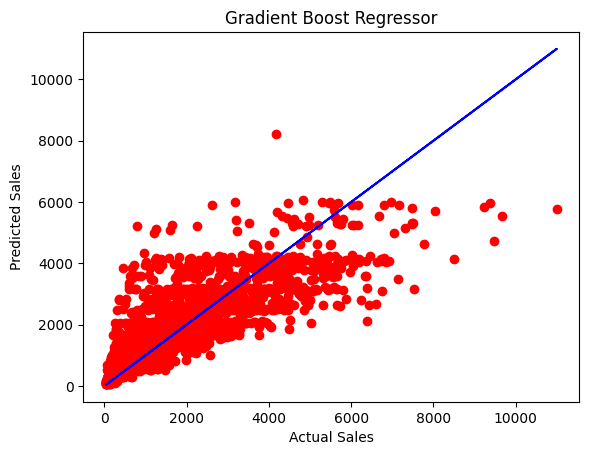

In [ ]:
plt.scatter(x=ytest,y=p,color='r')
plt.plot(ytest,ytest,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boost Regressor')

### Saving the model


In [ ]:
import joblib
joblib.dump(model,'Mart_Sales.obj')

['Mart_Sales.obj']

### Predicting the data set

In [ ]:
predictions=model.predict(test)
predictions

array([1610.57949336, 1386.58534402,  538.13101743, ..., 1903.87738941,
       3619.21757545, 1421.97323576])

##### Saving the predictions

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.to_csv('test_predictions.csv')